PFA HOUSING PROJECT

In [2425]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [2426]:
df=pd.read_csv('pfa_housing_train.csv',sep="\t")
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4         

In [2427]:
#Getting datatypes of the columns
for i in df.columns:
    print(i,df[i].dtypes)

Id int64
MSSubClass int64
MSZoning object
LotFrontage float64
LotArea int64
Street object
Alley object
LotShape object
LandContour object
Utilities object
LotConfig object
LandSlope object
Neighborhood object
Condition1 object
Condition2 object
BldgType object
HouseStyle object
OverallQual int64
OverallCond int64
YearBuilt int64
YearRemodAdd int64
RoofStyle object
RoofMatl object
Exterior1st object
Exterior2nd object
MasVnrType object
MasVnrArea float64
ExterQual object
ExterCond object
Foundation object
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinSF1 int64
BsmtFinType2 object
BsmtFinSF2 int64
BsmtUnfSF int64
TotalBsmtSF int64
Heating object
HeatingQC object
CentralAir object
Electrical object
1stFlrSF int64
2ndFlrSF int64
LowQualFinSF int64
GrLivArea int64
BsmtFullBath int64
BsmtHalfBath int64
FullBath int64
HalfBath int64
BedroomAbvGr int64
KitchenAbvGr int64
KitchenQual object
TotRmsAbvGrd int64
Functional object
Fireplaces int64
FireplaceQu object

SEPARATING THE NUMERICAL AND OBJECT DATATYPES FOR BETTER ANALYSIS

In [2428]:
obj_col=[]
num_col=[]
for i in df.columns:
    if(df[i].dtypes=='object'):
        obj_col.append(i)
    else:
        num_col.append(i)
print(len(obj_col))
print(len(num_col))
    

43
38


WORKING ON THE NUMERICAL DATA FIRST

In [2429]:
df[num_col].isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      214
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         7
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       64
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [2430]:
df[num_col].head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  127         120          NaN     4928            6            5       1976   
1  889          20         95.0    15865            8            6       1970   
2  793          60         92.0     9920            7            5       1996   
3  110          20        105.0    11751            6            6       1977   
4  422          20          NaN    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          1976         0.0         120           0        958         1078   
1          1970         0.0         351         823       1043         2217   
2          1997         0.0         862           0        255         1117   
3          1977       480.0         705           0       1139         1844   
4          2000       126.0        1246           0        356         1602   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       958         0             0        958             0             0   
1      2217         0             0       2217             1             0   
2      1127       886             0       2013             1             0   
3      1844         0             0       1844             0             0   
4      1602         0             0       1602             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         0             2             1             5           1   
1         2         0             4             1             8           1   
2         2         1             3             1             8           1   
3         2         0             3             1             7           1   
4         2         0             3             1             8           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       1977.0           2         440           0          205   
1       1970.0           2         621          81          207   
2       1997.0           2         455         180          130   
3       1977.0           2         546           0          122   
4       1977.0           2         529         240            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2007   
1              0          0          224         0        0      10    2007   
2              0          0            0         0        0       6    2007   
3              0          0            0         0        0       1    2010   
4              0          0            0         0        0       6    2009   

   SalePrice  
0     128000  
1     268000  
2     269790  
3     190000  
4     215000

HANDLING MISSING DATA FOR THE NUMERICAL COLUMN

In [2431]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [2432]:
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df[num_col].isnull().sum()

Id                0
MSSubClass        0
LotFrontage       0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        0
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      64
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

In [2433]:
df['GarageYrBlt'].nunique()

97

In [2434]:
from sklearn.impute import SimpleImputer

In [2435]:
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['GarageYrBlt']=imp.fit_transform(df['GarageYrBlt'].values.reshape(-1,1))

In [2436]:
df[num_col].isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [2437]:
for i in df[num_col]:
    print(i,df[i].nunique())

Id 1168
MSSubClass 15
LotFrontage 107
LotArea 892
OverallQual 10
OverallCond 9
YearBuilt 110
YearRemodAdd 61
MasVnrArea 284
BsmtFinSF1 551
BsmtFinSF2 122
BsmtUnfSF 681
TotalBsmtSF 636
1stFlrSF 669
2ndFlrSF 351
LowQualFinSF 21
GrLivArea 746
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
TotRmsAbvGrd 12
Fireplaces 4
GarageYrBlt 97
GarageCars 5
GarageArea 392
WoodDeckSF 244
OpenPorchSF 176
EnclosedPorch 106
3SsnPorch 18
ScreenPorch 65
PoolArea 8
MiscVal 20
MoSold 12
YrSold 5
SalePrice 581


In [2438]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean    724.136130    56.767979    70.988470   10484.749144     6.104452   
std     416.159877    41.940650    22.437056    8957.442311     1.390153   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     360.500000    20.000000    60.000000    7621.500000     5.000000   
50%     714.500000    50.000000    70.988470    9522.500000     6.000000   
75%    1079.500000    70.000000    79.250000   11515.500000     7.000000   
max    1460.000000   190.000000   313.000000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027   
std       1.124343    30.145255     20.785185   182.047152   462.664785   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean     46.647260   569.721747  1061.095034  1169.860445   348.826199   
std     163.520016   449.375525   442.272249   391.161983   439.696370   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   216.000000   799.000000   892.000000     0.000000   
50%       0.000000   474.000000  1005.500000  1096.500000     0.000000   
75%       0.000000   816.000000  1291.500000  1392.000000   729.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean       6.380137  1525.066781      0.425514      0.055651     1.562500   
std       50.892844   528.042957      0.521615      0.236699     0.551882   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1143.250000      0.000000      0.000000     1.000000   
50%        0.000000  1468.500000      0.000000      0.000000     2.000000   
75%        0.000000  1795.000000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean   1979.717466     1.776541   476.860445    96.206336    46.559932   
std      25.012983     0.745554   214.466769   126.158988    66.381023   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1962.000000     1.000000   338.000000     0.000000     0.000000   
50%    1984.500000     2.000000   480.000000     0.000000    24.000000   
75%    2003.000000     2.000000   576.000000   171.000000    70.000000   
max    2

CHECKING FOR OUTLIERS

Id


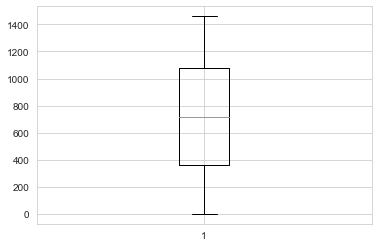

MSSubClass


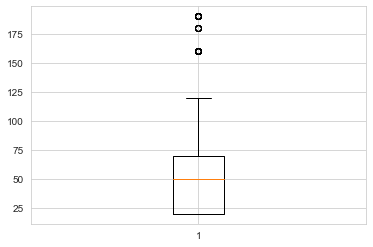

LotFrontage


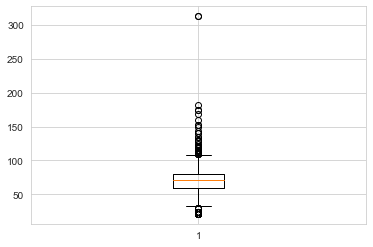

LotArea


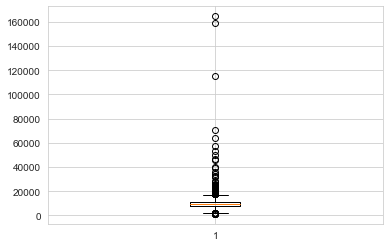

OverallQual


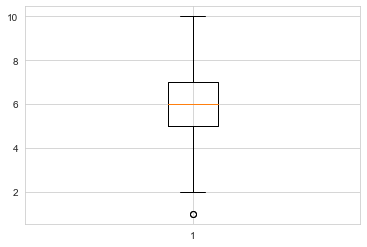

OverallCond


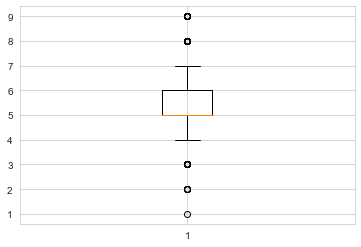

YearBuilt


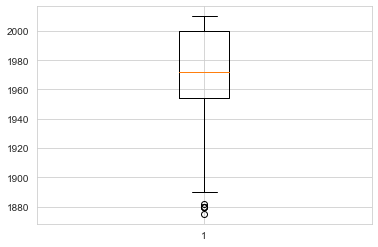

YearRemodAdd


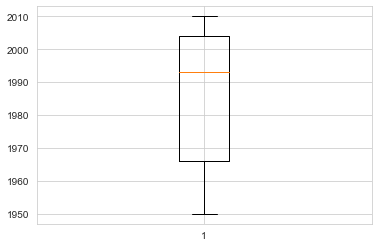

MasVnrArea


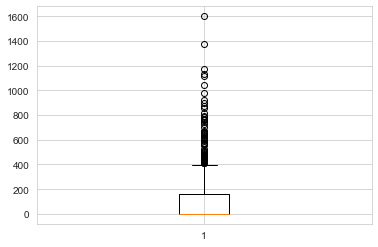

BsmtFinSF1


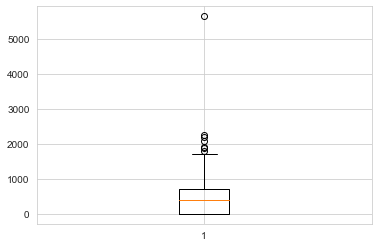

BsmtFinSF2


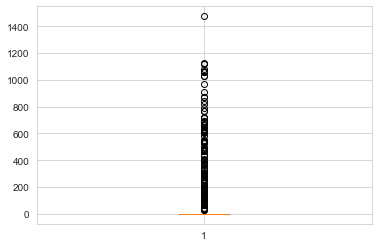

BsmtUnfSF


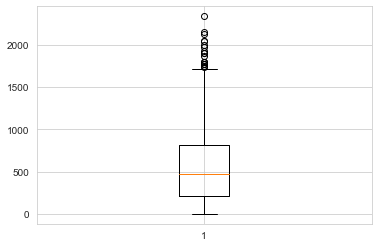

TotalBsmtSF


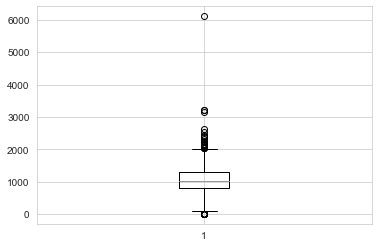

1stFlrSF


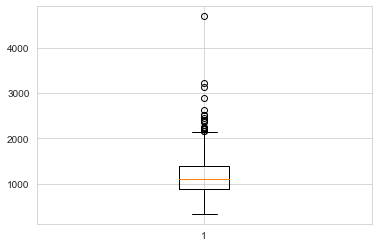

2ndFlrSF


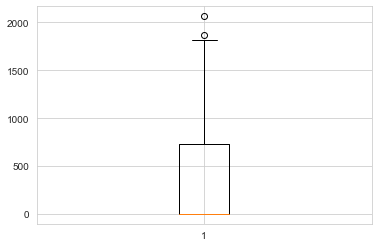

LowQualFinSF


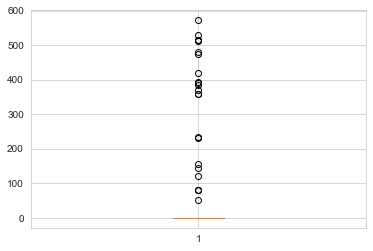

GrLivArea


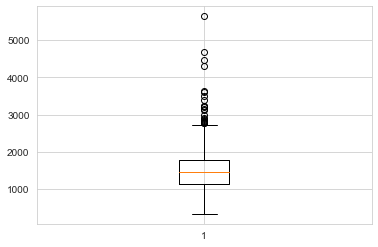

BsmtFullBath


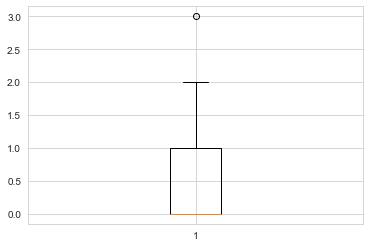

BsmtHalfBath


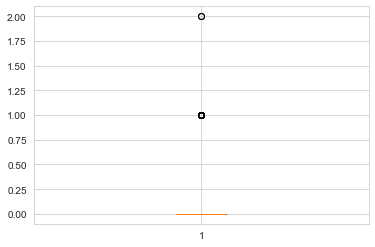

FullBath


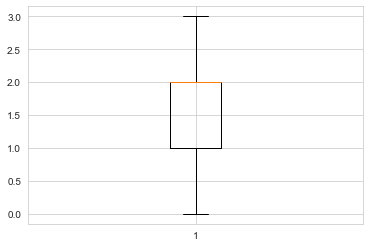

HalfBath


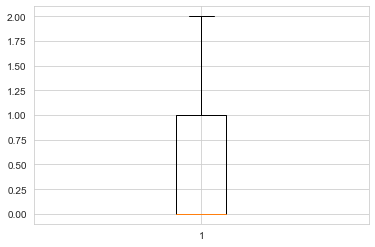

BedroomAbvGr


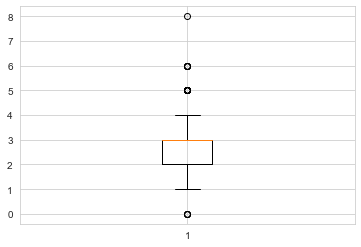

KitchenAbvGr


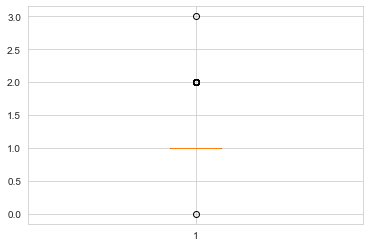

TotRmsAbvGrd


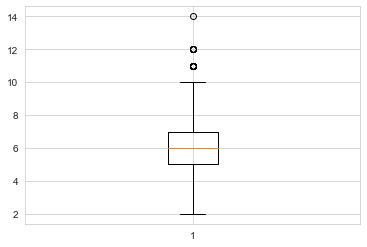

Fireplaces


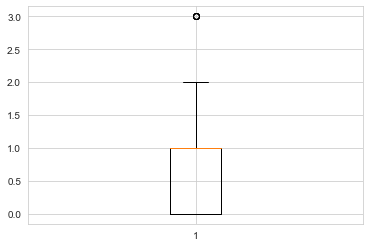

GarageYrBlt


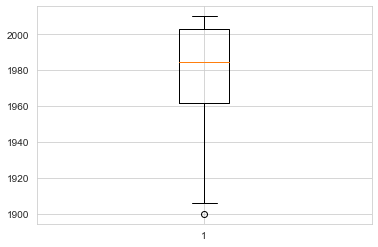

GarageCars


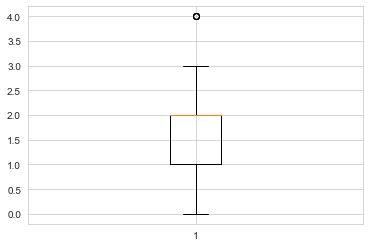

GarageArea


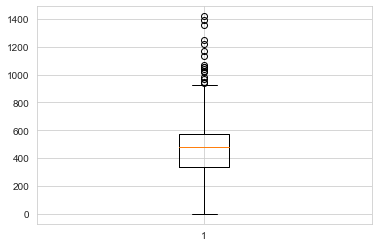

WoodDeckSF


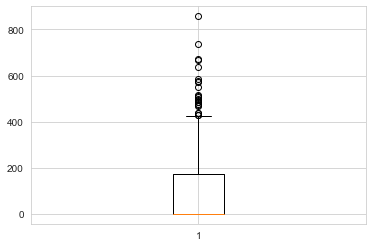

OpenPorchSF


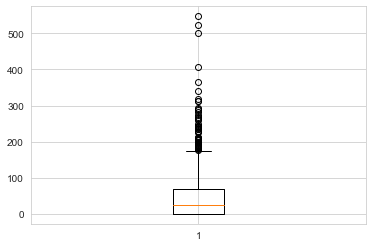

EnclosedPorch


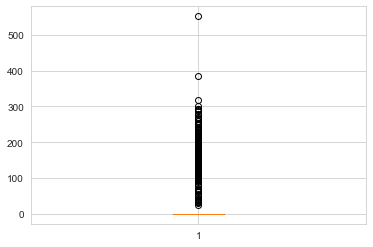

3SsnPorch


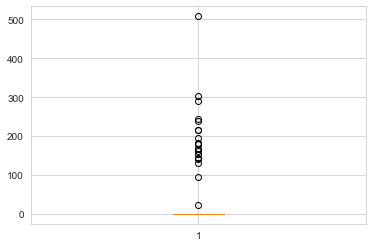

ScreenPorch


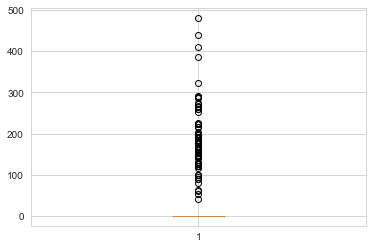

PoolArea


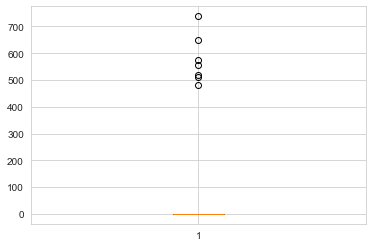

MiscVal


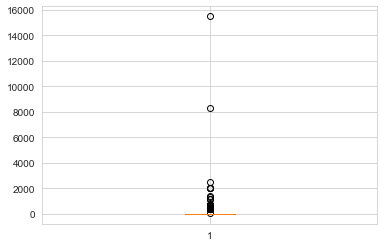

MoSold


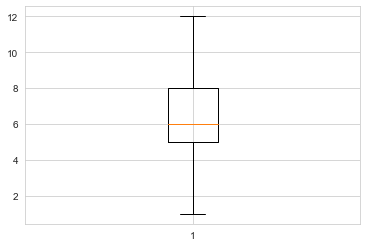

YrSold


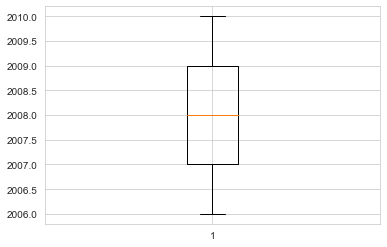

SalePrice


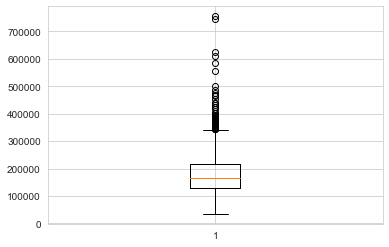

In [2439]:
for i in df[num_col]:
    plt.boxplot(df[i])
    print(i)
    plt.show()

LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice all show presence of outliers

In [2440]:
from scipy.stats import zscore

In [2441]:
z=np.abs(zscore(df[num_col]))
threshold=3
print(np.where(z>3))

(array([   1,    1,    4,    7,   14,   20,   22,   23,   25,   27,   32,
         32,   32,   32,   33,   38,   40,   47,   48,   51,   51,   63,
         64,   66,   66,   68,   68,   72,   72,   73,   74,   76,   77,
         78,   91,   93,   93,   94,   95,   96,   97,   98,   98,  103,
        103,  103,  103,  103,  103,  103,  106,  106,  107,  112,  113,
        115,  119,  119,  119,  119,  120,  127,  127,  133,  133,  138,
        138,  140,  141,  141,  141,  141,  141,  141,  141,  141,  142,
        142,  143,  146,  150,  151,  152,  153,  156,  156,  157,  162,
        164,  166,  170,  178,  178,  184,  187,  191,  192,  192,  192,
        192,  195,  196,  196,  205,  206,  210,  210,  211,  211,  212,
        214,  216,  219,  226,  228,  232,  232,  232,  232,  237,  241,
        241,  241,  241,  243,  245,  245,  253,  254,  255,  257,  259,
        269,  272,  273,  284,  284,  289,  290,  299,  299,  300,  301,
        303,  304,  305,  305,  305,  305,  305,  

In [2442]:
df=df[(z<3).all(axis=1)]
df.shape

(803, 81)

Id


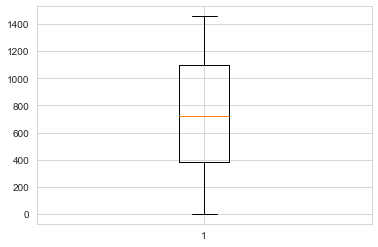

MSSubClass


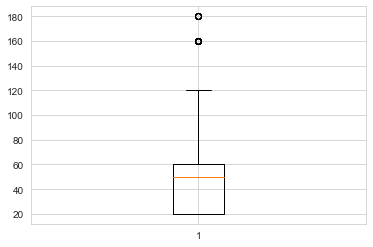

LotFrontage


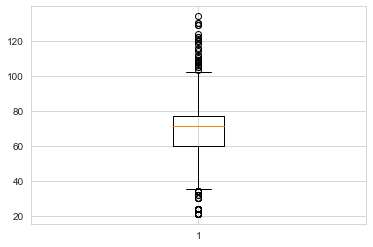

LotArea


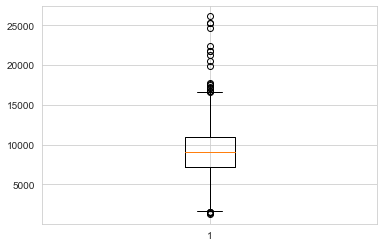

OverallQual


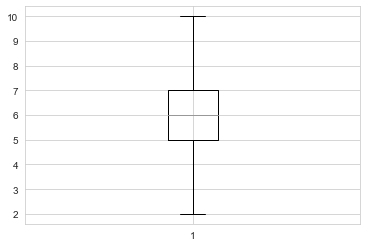

OverallCond


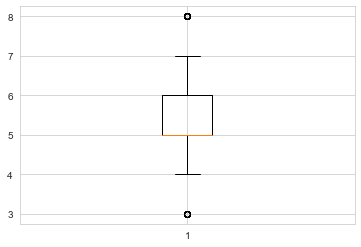

YearBuilt


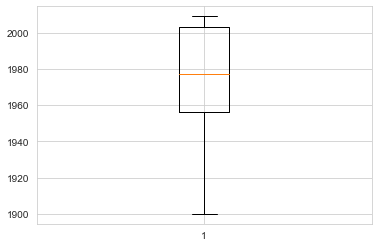

YearRemodAdd


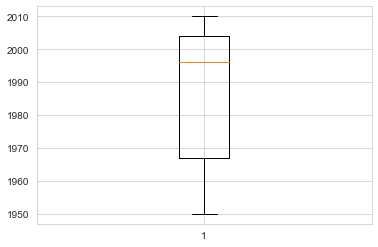

MasVnrArea


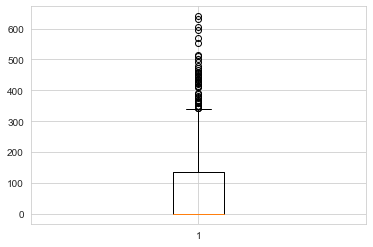

BsmtFinSF1


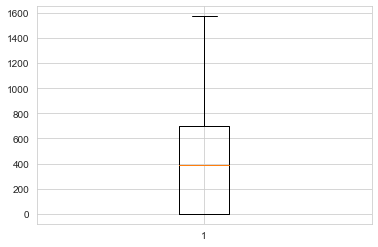

BsmtFinSF2


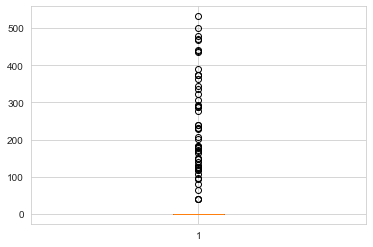

BsmtUnfSF


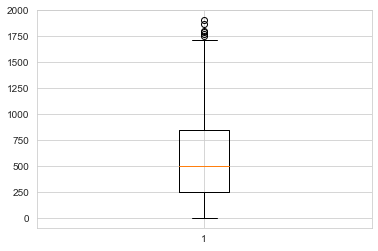

TotalBsmtSF


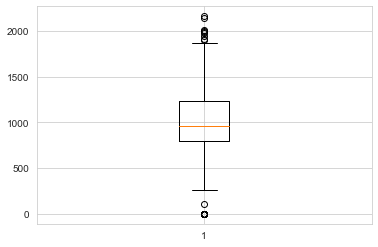

1stFlrSF


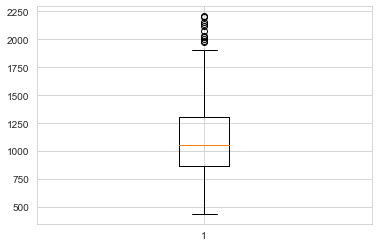

2ndFlrSF


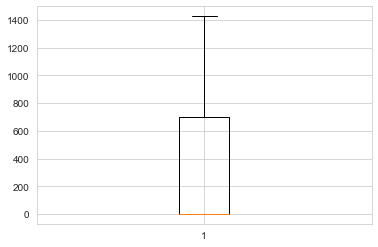

LowQualFinSF


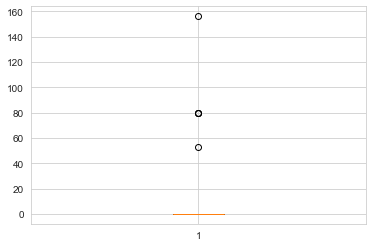

GrLivArea


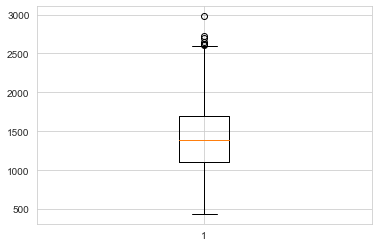

BsmtFullBath


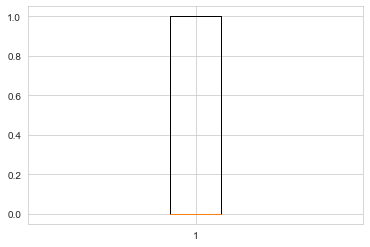

BsmtHalfBath


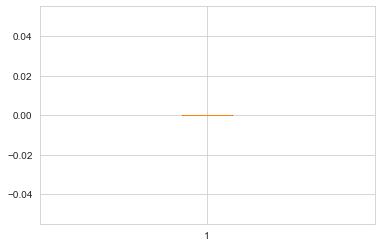

FullBath


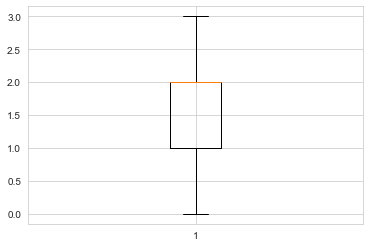

HalfBath


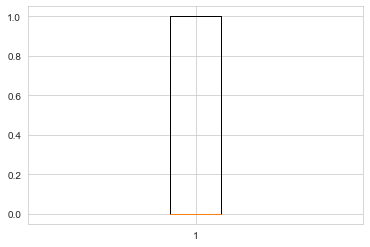

BedroomAbvGr


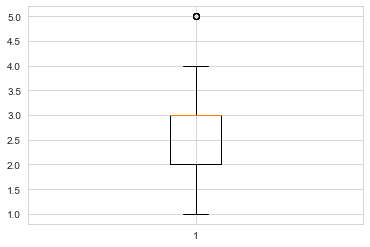

KitchenAbvGr


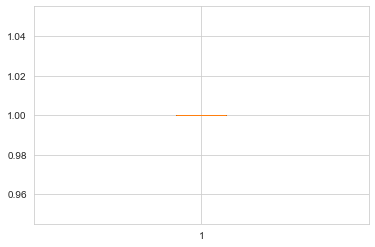

TotRmsAbvGrd


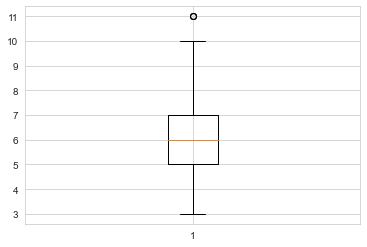

Fireplaces


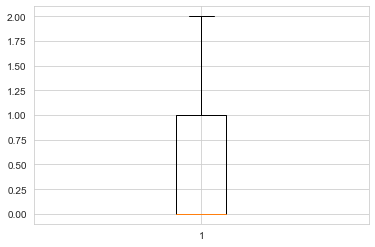

GarageYrBlt


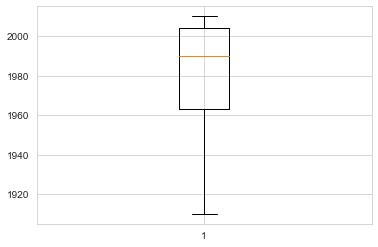

GarageCars


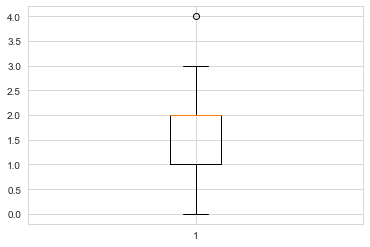

GarageArea


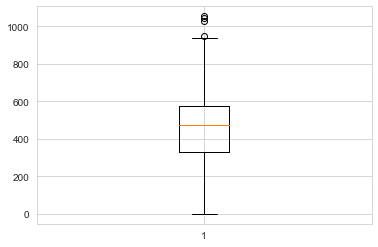

WoodDeckSF


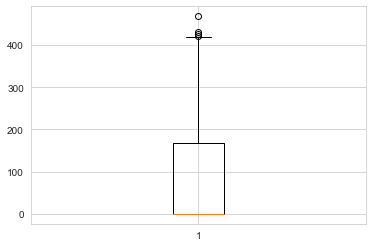

OpenPorchSF


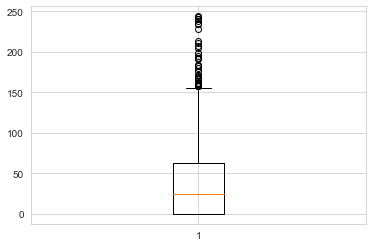

EnclosedPorch


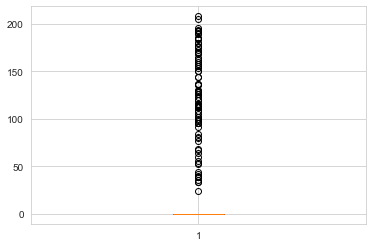

3SsnPorch


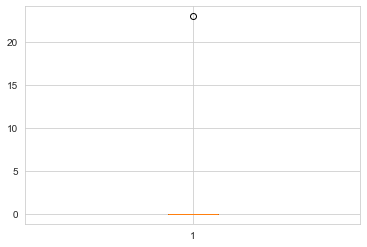

ScreenPorch


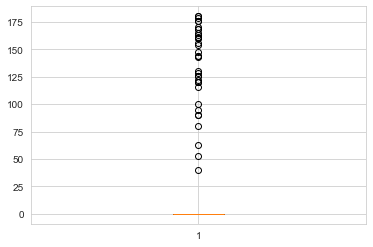

PoolArea


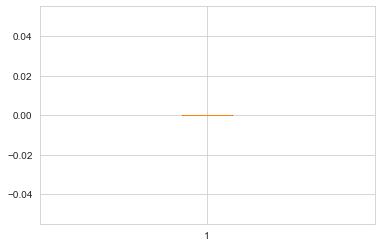

MiscVal


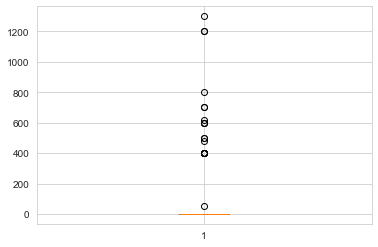

MoSold


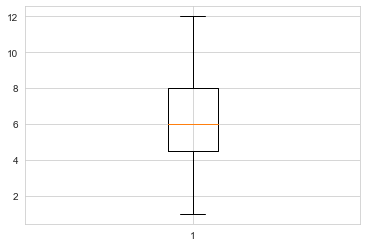

YrSold


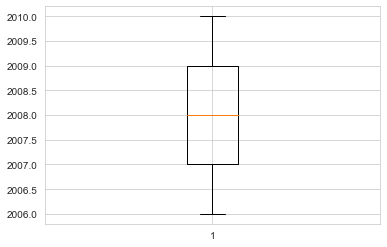

SalePrice


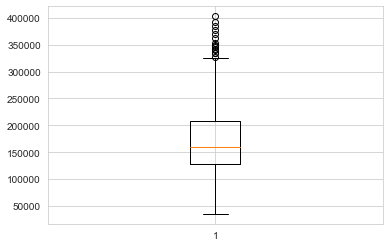

In [2443]:
for i in df[num_col]:
    plt.boxplot(df[i])
    print(i)
    plt.show()

<AxesSubplot:>

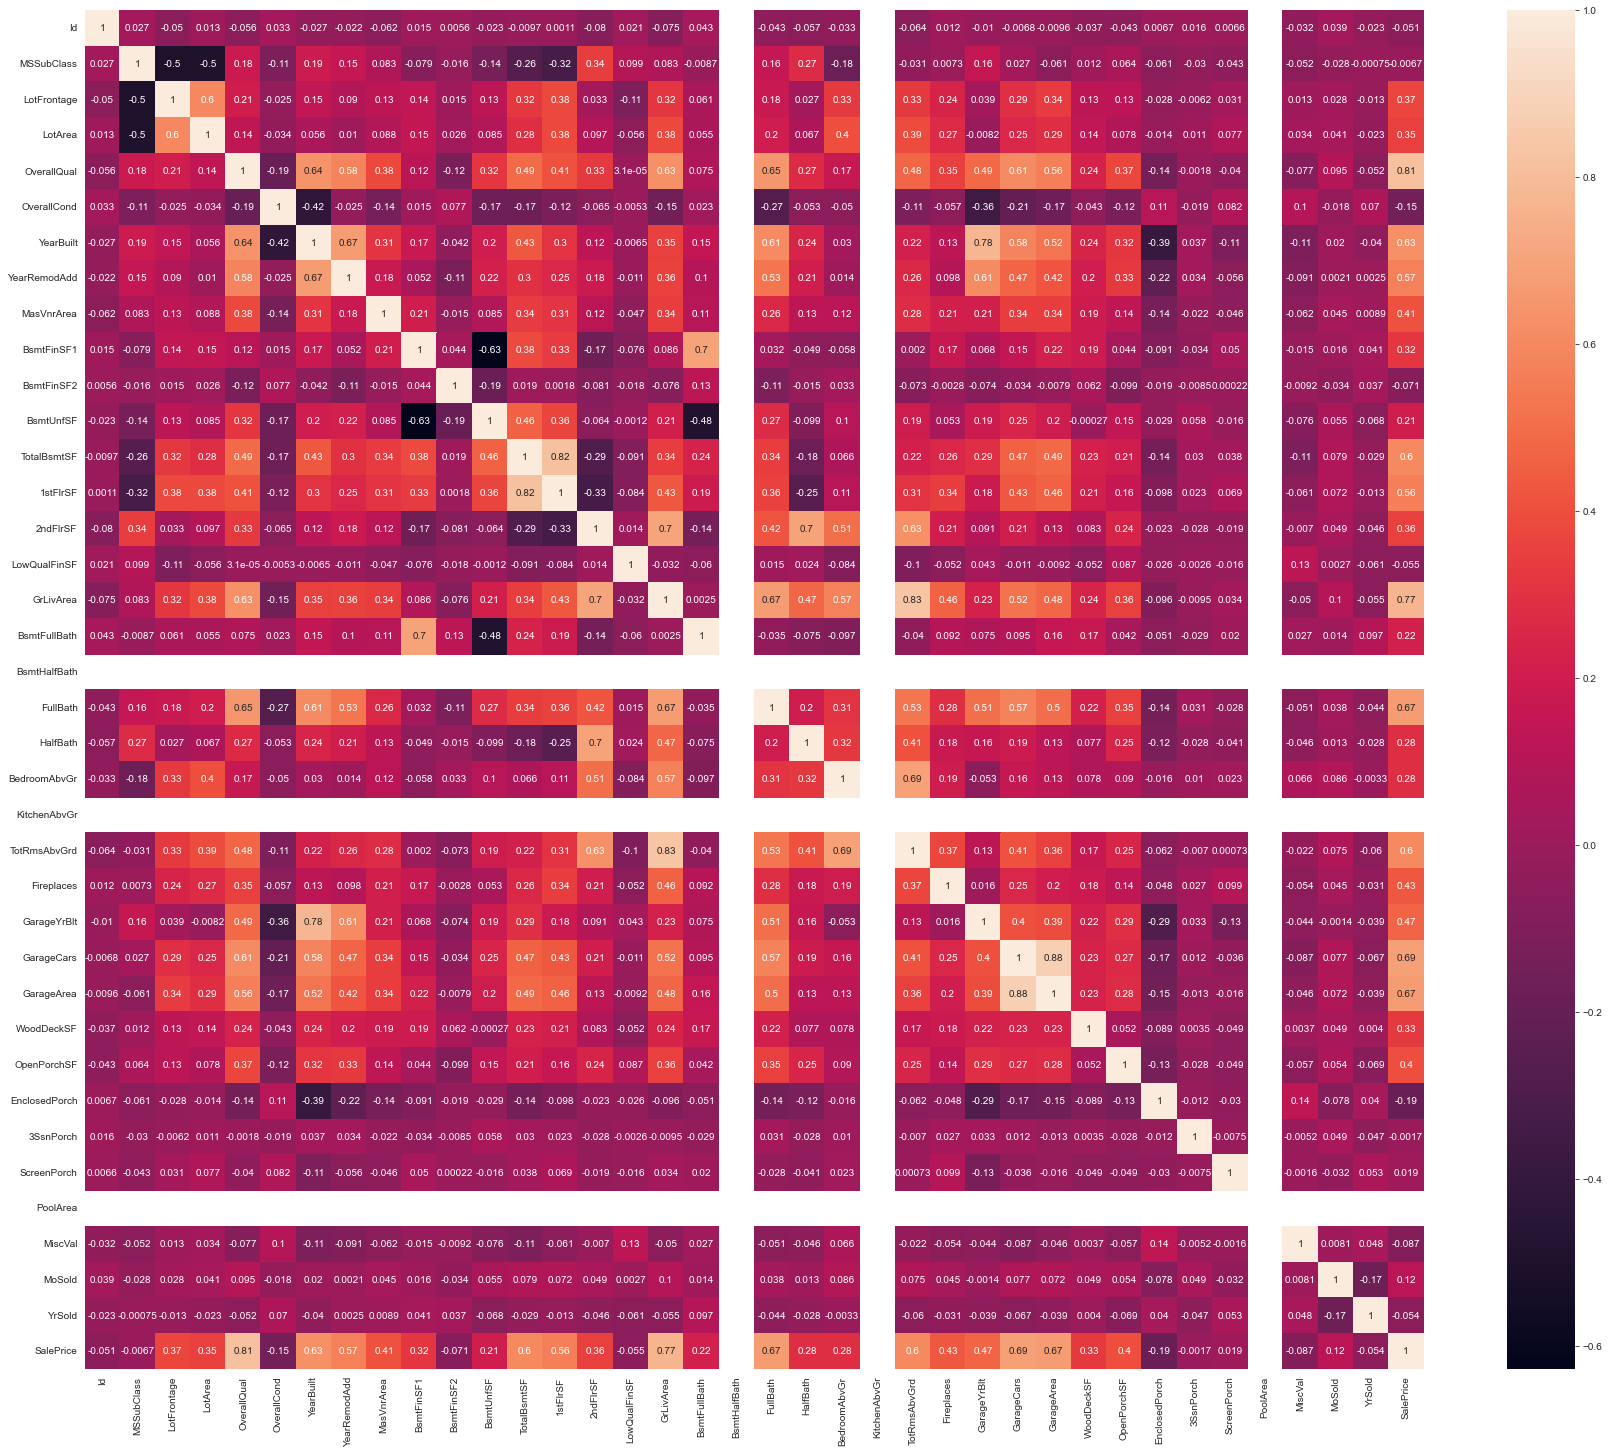

In [2444]:
plt.figure(figsize=(30,25))
sns.heatmap(df[num_col].corr(),annot=True)

In [2445]:
df[num_col].skew()

Id               -0.004853
MSSubClass        1.394020
LotFrontage       0.004547
LotArea           0.590032
OverallQual       0.014959
OverallCond       0.728678
YearBuilt        -0.583781
YearRemodAdd     -0.577825
MasVnrArea        1.692685
BsmtFinSF1        0.574263
BsmtFinSF2        4.753041
BsmtUnfSF         0.742732
TotalBsmtSF       0.121094
1stFlrSF          0.645319
2ndFlrSF          0.737746
LowQualFinSF     15.502663
GrLivArea         0.551514
BsmtFullBath      0.404771
BsmtHalfBath      0.000000
FullBath          0.032689
HalfBath          0.496141
BedroomAbvGr     -0.159870
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.378751
Fireplaces        0.598419
GarageYrBlt      -0.781622
GarageCars       -0.342937
GarageArea       -0.034515
WoodDeckSF        0.945520
OpenPorchSF       1.444519
EnclosedPorch     2.864272
3SsnPorch        28.337255
ScreenPorch       4.758951
PoolArea          0.000000
MiscVal           8.100346
MoSold            0.277080
YrSold            0.112178
S

In [2446]:
df['LowQualFinSF'].unique()

array([  0,  53, 156,  80], dtype=int64)

In [2447]:
df['3SsnPorch'].unique()

array([ 0, 23], dtype=int64)

<AxesSubplot:xlabel='SalePrice', ylabel='MSSubClass'>

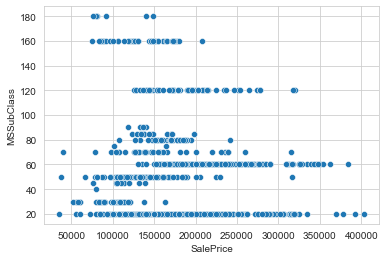

In [2448]:
sns.scatterplot(data=df[num_col],x='SalePrice',y='MSSubClass')

In [2449]:
df[num_col].nunique()

Id               803
MSSubClass        14
LotFrontage       92
LotArea          640
OverallQual        9
OverallCond        6
YearBuilt         97
YearRemodAdd      61
MasVnrArea       212
BsmtFinSF1       397
BsmtFinSF2        51
BsmtUnfSF        536
TotalBsmtSF      481
1stFlrSF         502
2ndFlrSF         259
LowQualFinSF       4
GrLivArea        546
BsmtFullBath       2
BsmtHalfBath       1
FullBath           4
HalfBath           2
BedroomAbvGr       5
KitchenAbvGr       1
TotRmsAbvGrd       9
Fireplaces         3
GarageYrBlt       93
GarageCars         5
GarageArea       312
WoodDeckSF       173
OpenPorchSF      129
EnclosedPorch     63
3SsnPorch          2
ScreenPorch       28
PoolArea           1
MiscVal           11
MoSold            12
YrSold             5
SalePrice        451
dtype: int64

In [2450]:
df['PoolArea'].unique()

array([0], dtype=int64)

DROPPING THE COLUMNS THAT HAVE ONLY ONE UNIQUE VALUE AS THE VALUES ARE SAME FOR ALL THE ROWS

In [2451]:
df.drop('PoolArea',axis=1,inplace=True)
df.drop('BsmtHalfBath',axis=1,inplace=True)
df.drop('KitchenAbvGr',axis=1,inplace=True)


In [2452]:
num_col.pop(33)

'PoolArea'

In [2453]:
num_col.pop(18)

'BsmtHalfBath'

In [2454]:
num_col.pop(21)

'KitchenAbvGr'

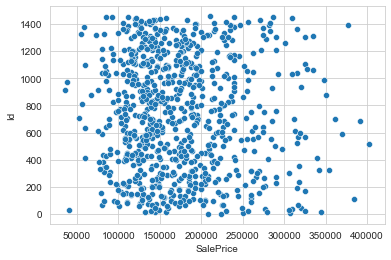

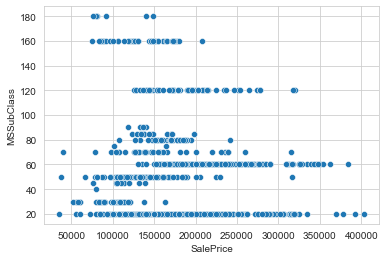

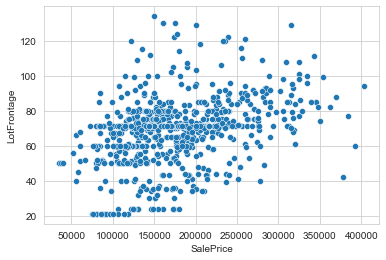

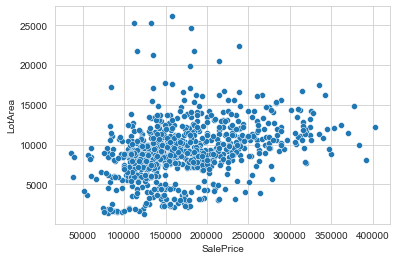

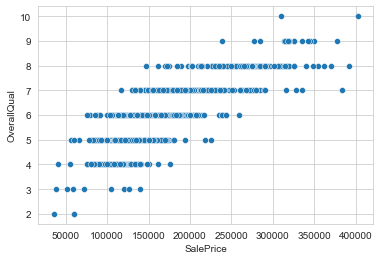

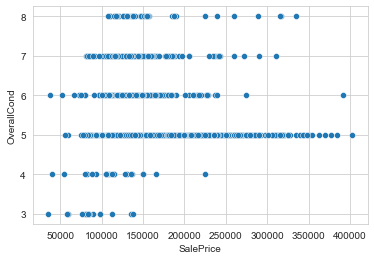

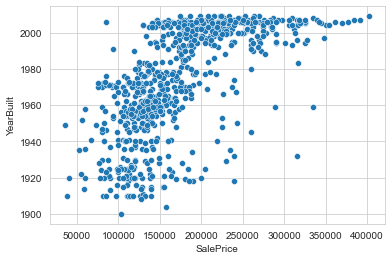

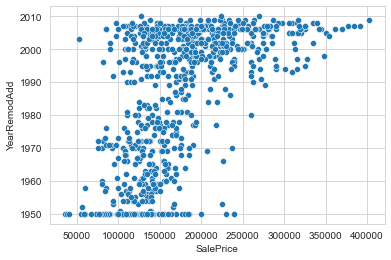

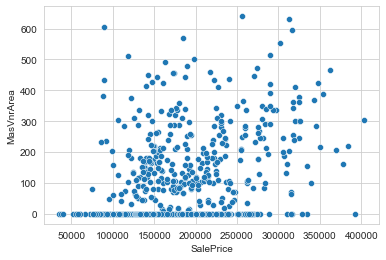

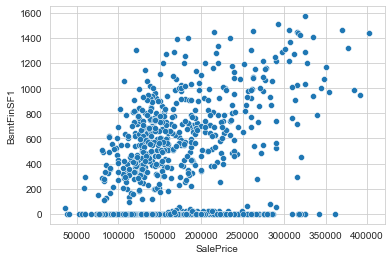

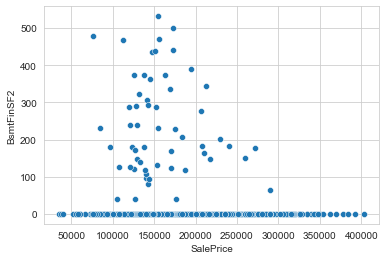

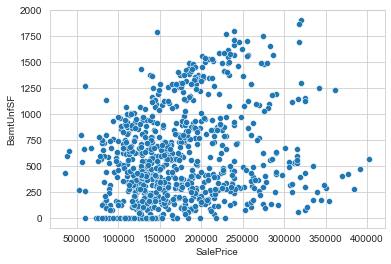

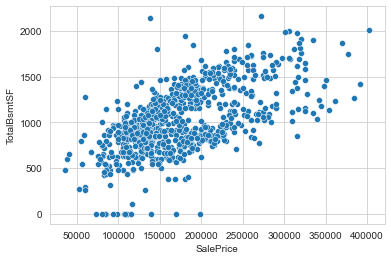

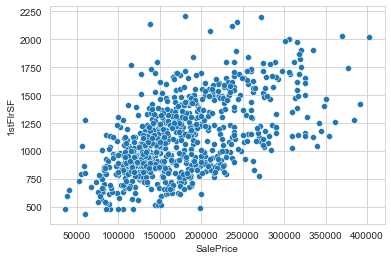

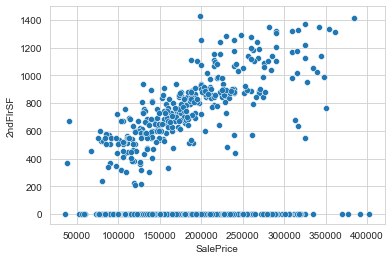

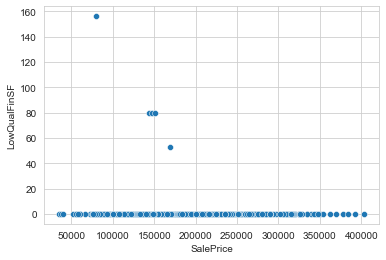

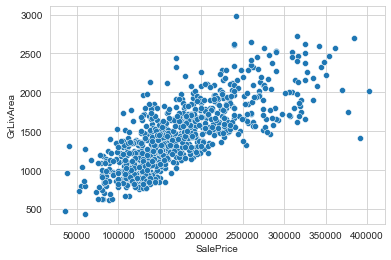

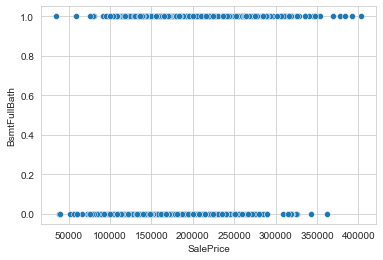

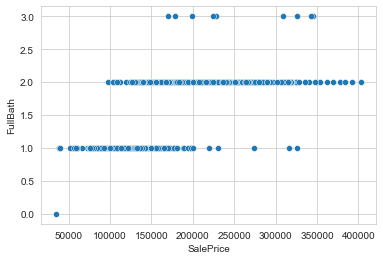

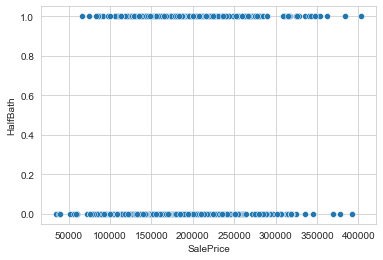

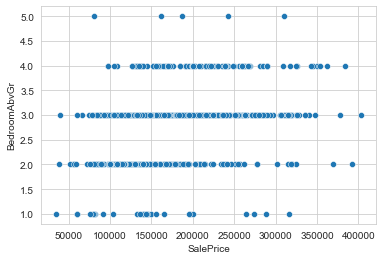

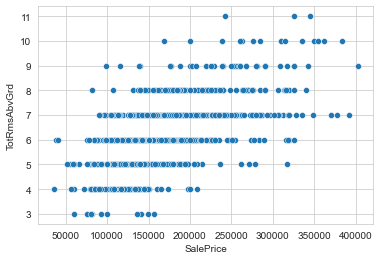

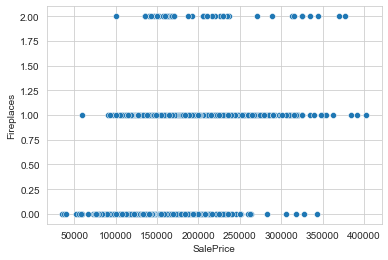

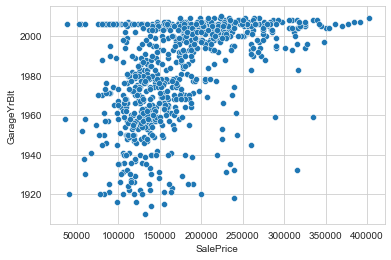

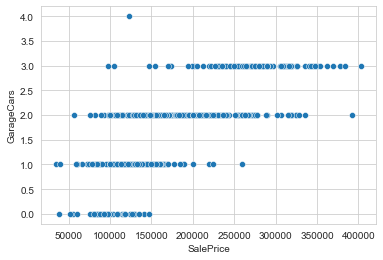

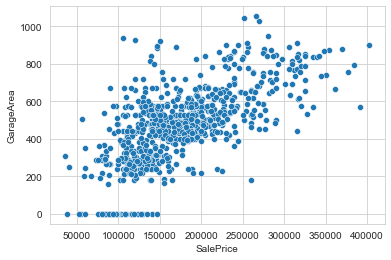

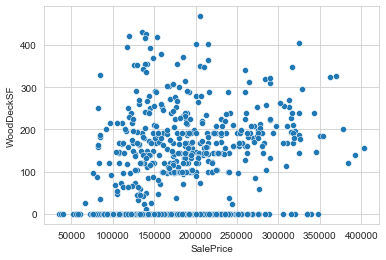

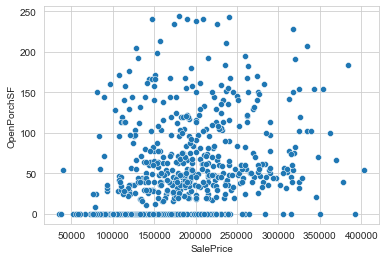

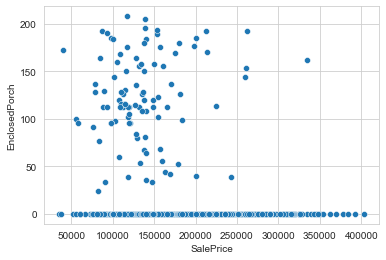

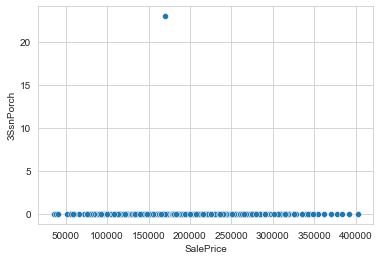

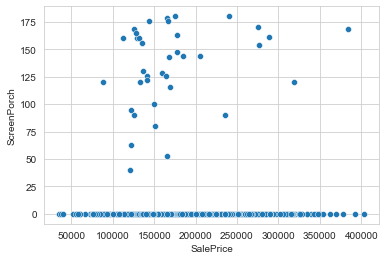

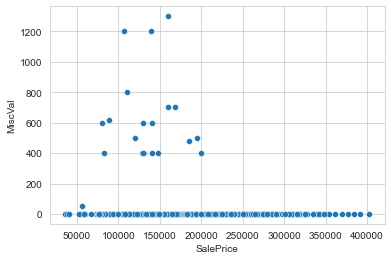

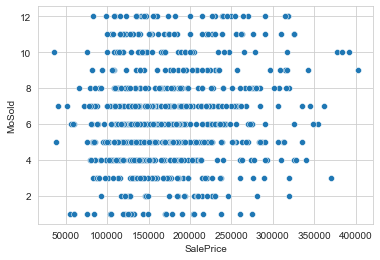

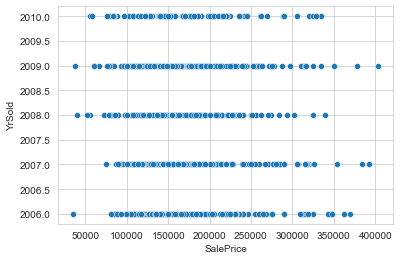

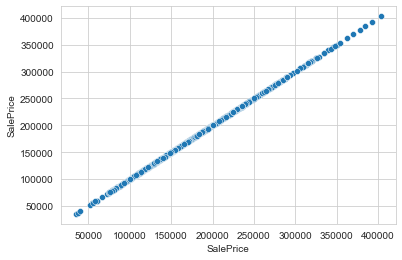

In [2455]:
for i in num_col:
    sns.scatterplot(data=df[num_col],x='SalePrice',y=df[i])
    plt.show()

KEY OBSERVATIONS:
    1)SalePrice shows that most of the properties with a lot frontage of 40-80 have a price ranging in between 75,000 to    2,50,000. The properties in this sample mostly have a lot frontage ranging between 60 to 80.
    2)SalePrice shows that most of the properties with a lot area of 5000-13,000(square feet)have a price ranging from 1,00,000 to 2,50,000.The properties in this sample mostly have a lot area concentrated in 5000-15,000 range.
    3)The sale price is directly propotional to the OverallQuality.Most of the properties lie in the quality range of 5 to 8.
    4)The sale price is highest for the houses in OverallCond-5(Average condition).
    5)The properties built after the year-2000 have a direct positive relationship with the SalePrice.
    6)The properties buit between 1940 and 1980 mostly have a SalePrice ranging  from 1,00,00 to 1,70,000 (approx).
    7)The biggest chunk of the properties were built/remodeled after the year-2000.
    8)The SalePrice shows an increase with an increase in BsmtFinType1 area over 200(squarefeet) although a large chunk of properties with a BsmtFinType1 area of 0(square feet) too have prices ranging between 50,000-35,000(approx).
    9)Most properties have a BsmtFinType2 area of 0(square feet) and have prices ranging between(50,000 and4,00,000).
    10)Most properties have a Unfinished square feet of basement area concentrated between 0  and 1,000.
    11)The SalePrice is directly propotional to the Total square feet of basement area over 500 (squarefeet).
    12)Most properties have a TotalBsmtSF between 500-1500(square feet).
    13)First Floor square feet has a positive relationship with the SalePrice.
    14)The SalePrice increases with an increase in Second floor square feet(2ndFlrSF) above 400(square feet).
    15)The SalePrice ranges between 50,000 to 3,50,000 and even upto 4,00,000 in some cases.
    16)The SalePrice shows a direct,positive relationship with the GrLivArea(Above grade (ground) living area square feet).Increase in one will correspond to an increase in the other.
    17)The sale price is the highest for the FullBath(Full bathrooms above grade 2).
    18)Most properties have TotRmsAbvGrd(Total rooms above grade (does not include bathrooms) are mostly between 4 and 9.
    19)Properties having GarageYrBlt(Year garage was built) after 2000 have the highest range of salePrice(50,000-4,00,000).
    20)Properties built between the year 1940-1980 have prices mostly between 75,000 and 2,00,000.
    21)The SalePrice is directly propotion to GarageCars(Size of garage in car capacity).
    22)The SalePrice has a direct,positive relation with GarageArea(Size of garage in square feet) above 200(sq.feet).
 

    

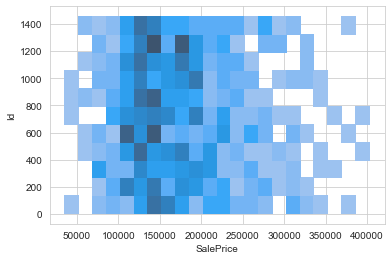

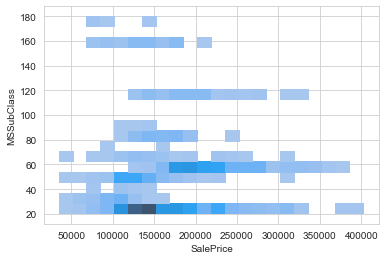

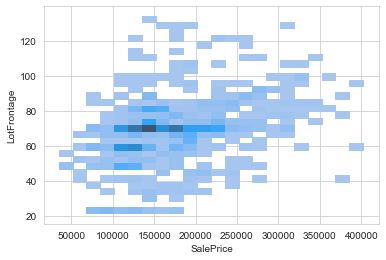

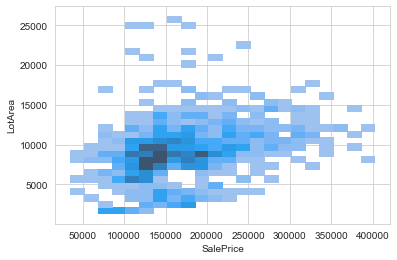

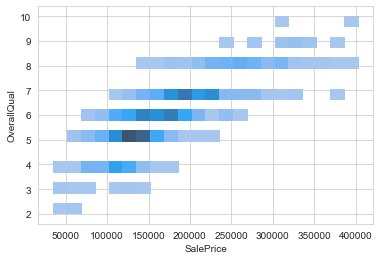

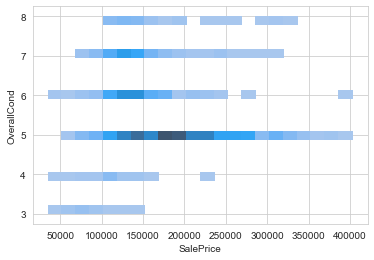

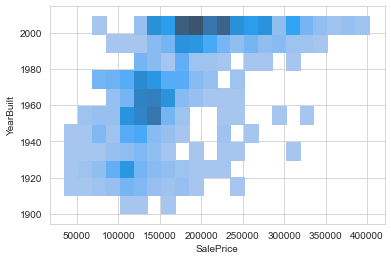

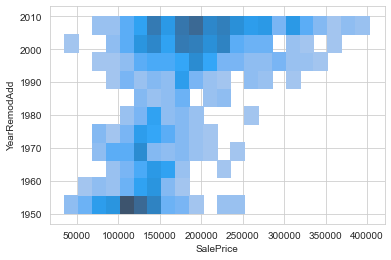

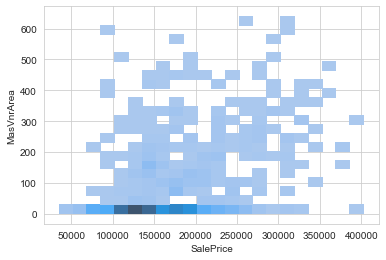

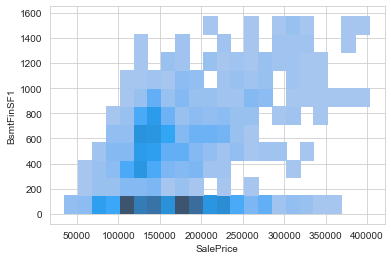

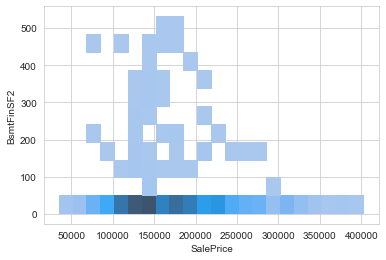

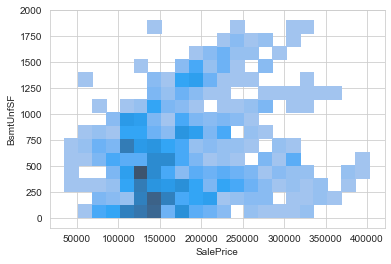

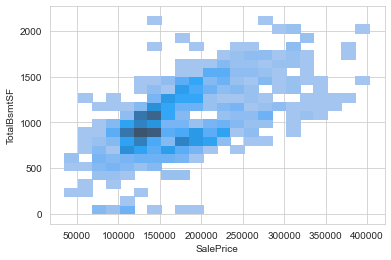

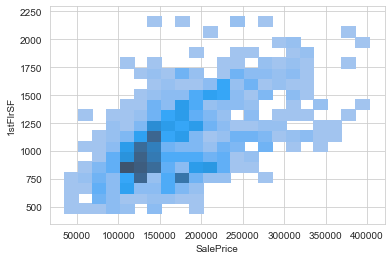

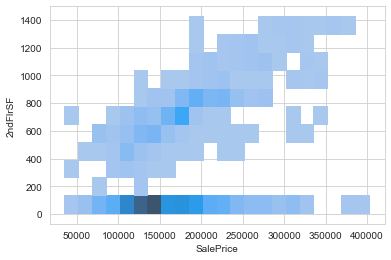

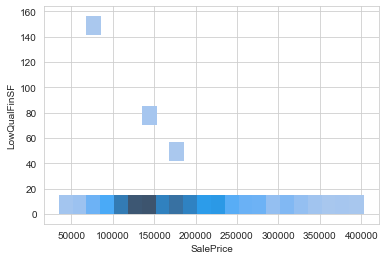

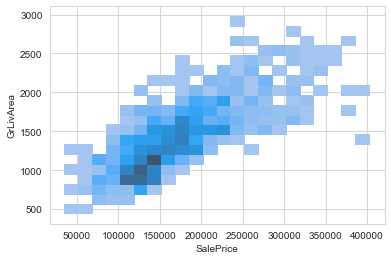

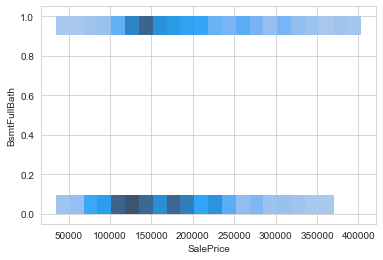

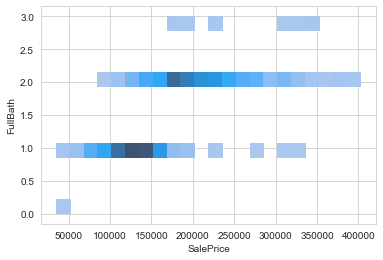

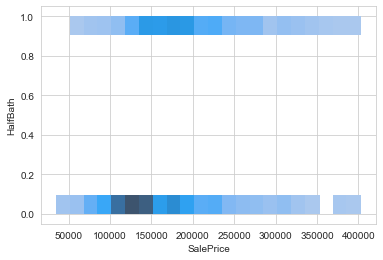

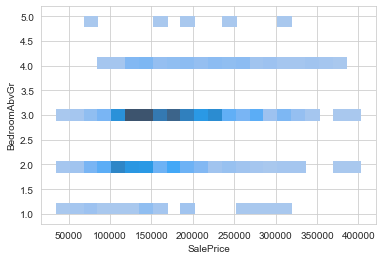

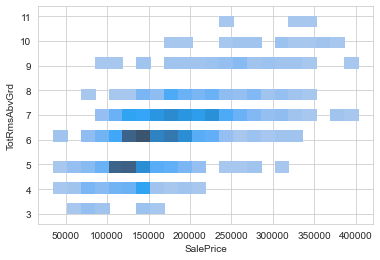

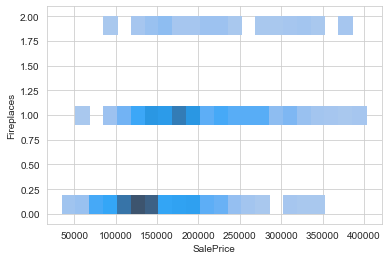

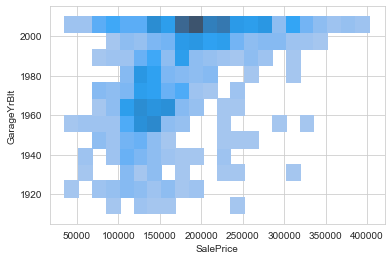

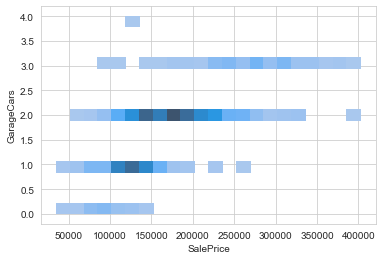

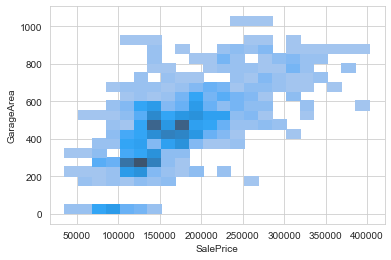

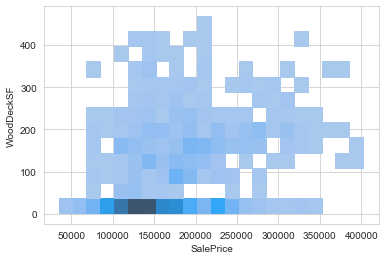

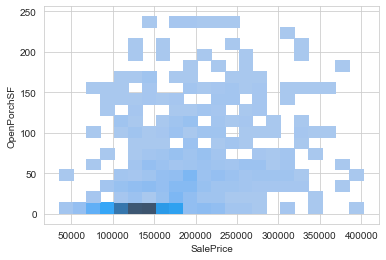

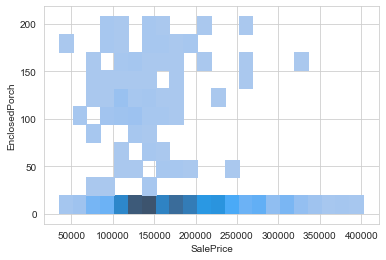

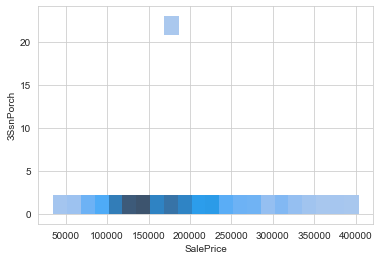

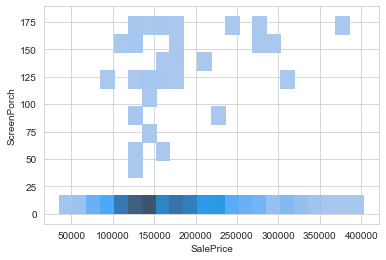

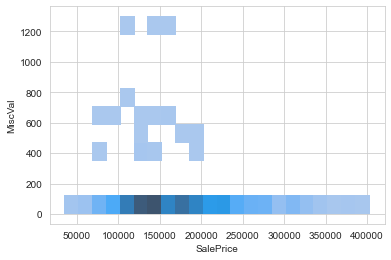

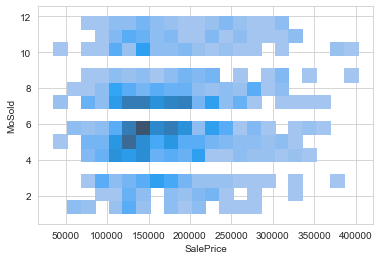

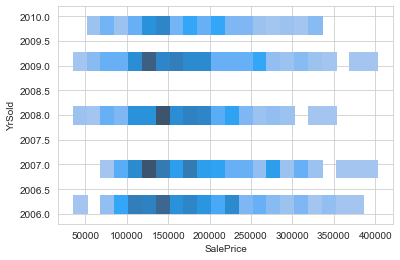

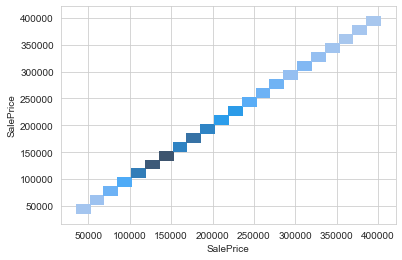

In [2456]:
for i in num_col:
    
    sns.histplot(data=df[num_col],x='SalePrice',y=df[i])
    plt.show()

<AxesSubplot:xlabel='YearBuilt'>

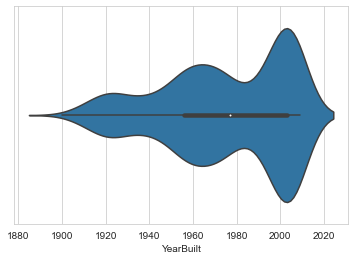

In [2457]:
sns.violinplot(data=df[num_col],x='YearBuilt')

<AxesSubplot:xlabel='TotalBsmtSF'>

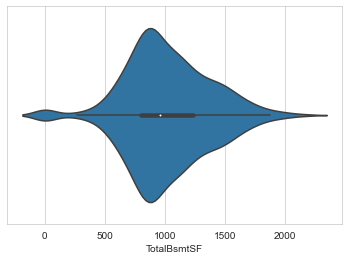

In [2458]:
sns.violinplot(data=df[num_col],x='TotalBsmtSF')

In [2459]:
for i in num_col:
    print(i,df[i].value_counts())
    

Id 1457    1
483     1
503     1
502     1
501     1
       ..
971     1
969     1
968     1
967     1
1       1
Name: Id, Length: 803, dtype: int64
MSSubClass 20     317
60     174
50      81
120     52
160     43
30      40
70      32
80      28
85      15
45       8
180      6
90       4
75       2
40       1
Name: MSSubClass, dtype: int64
LotFrontage 70.98847     141
60.00000      65
70.00000      41
80.00000      41
50.00000      34
            ... 
116.00000      1
87.00000       1
112.00000      1
107.00000      1
102.00000      1
Name: LotFrontage, Length: 92, dtype: int64
LotArea 9600     13
6000     12
7200     11
9000      9
8125      7
         ..
7837      1
11932     1
7910      1
8068      1
10240     1
Name: LotArea, Length: 640, dtype: int64
OverallQual 5     206
7     199
6     196
8      97
4      76
9      16
3       8
2       3
10      2
Name: OverallQual, dtype: int64
OverallCond 5    476
6    139
7    109
8     42
4     22
3     15
Name: OverallCond, dtype: int64

SOME OF THE FEATURES IN THE DATASET SHOW SIGNS OF MULTICOLLINEARITY(FOR EXAMPLE : TotalBsmtSF & 1stFlrSF,GarageCars & GarageArea,TotRmsAbvGrd & GrLivArea).


MERGING THE COLUMNS SHOWING MULTICOLLINEARITY WITH THE TARGET VARIABLES AND AMONGST THEMSELVES INTO A NEW COLUMN CONTAINING THE AVERAGE OFTHE SUM OF THE AFOREMENTIONED FEATURES

In [2460]:
df['TotalBsmtSF & 1stFlrSF']=(df['TotalBsmtSF']+df['1stFlrSF'])/2
df['GarageCars & GarageArea']=(df['GarageCars']+df['GarageArea'])/2
df['TotRmsAbvGrd & GrLivArea']=(df['TotRmsAbvGrd']+df['GrLivArea'])/2


Dropping the parent columns from which the new columns were formed

In [2461]:
drop_list=['TotalBsmtSF','1stFlrSF','GarageCars','GarageArea','TotRmsAbvGrd','GrLivArea']
for i in drop_list:
    df.drop(i,axis=1,inplace=True)
    


<AxesSubplot:>

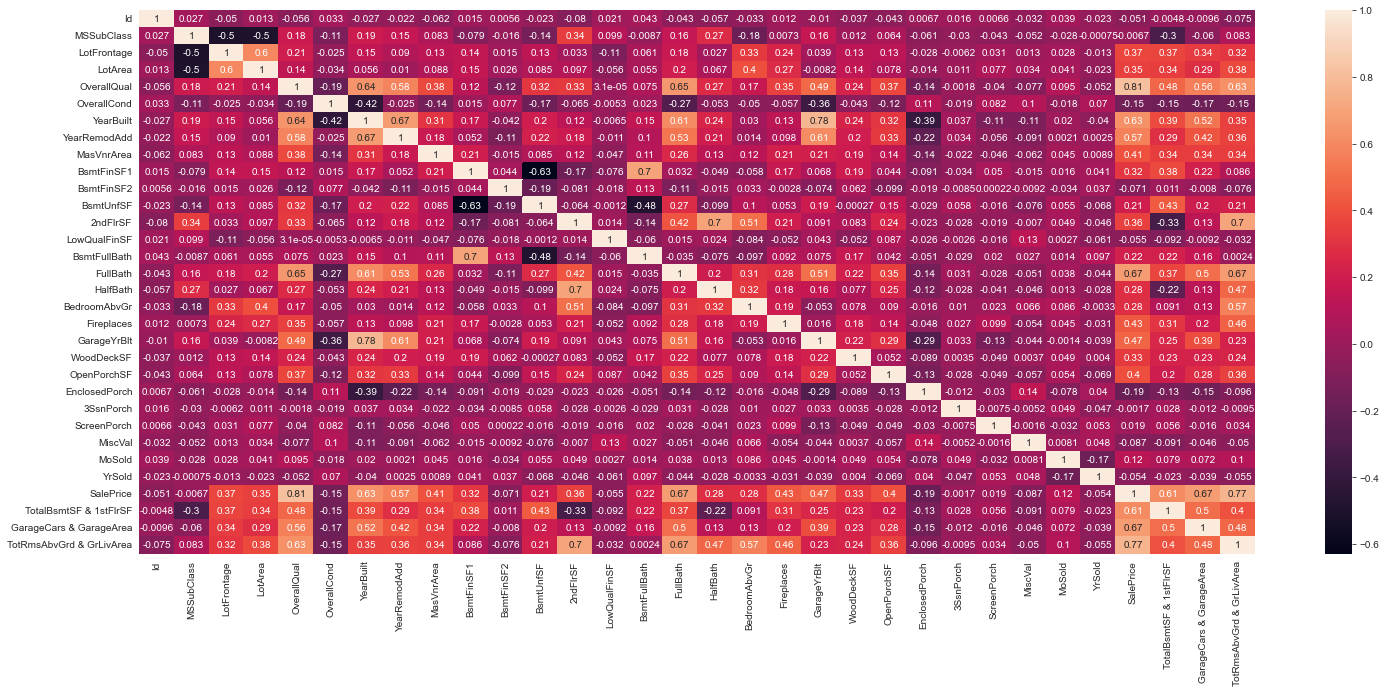

In [2462]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True)

Id


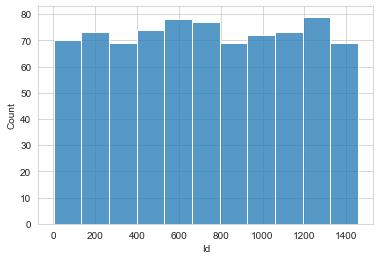

MSSubClass


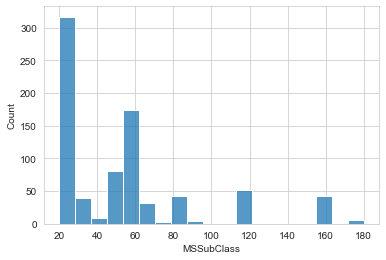

MSZoning


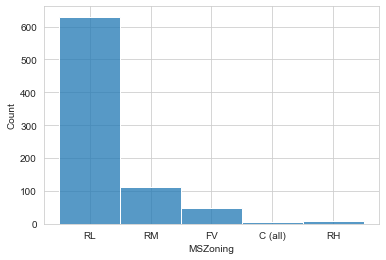

LotFrontage


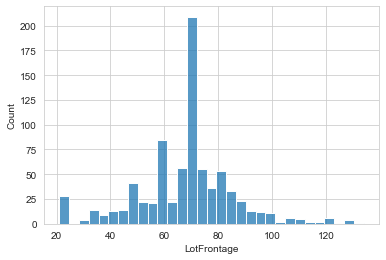

LotArea


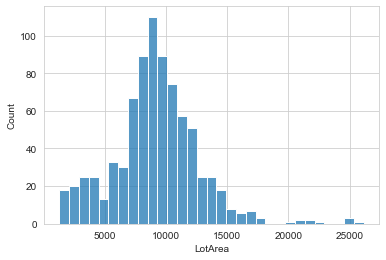

Street


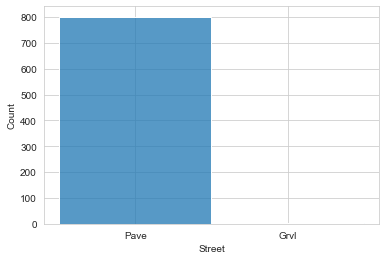

Alley


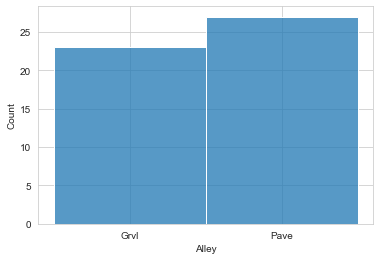

LotShape


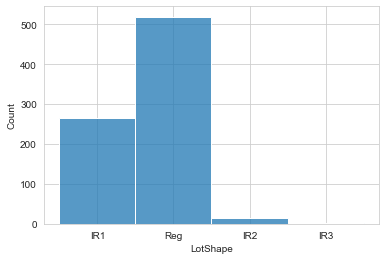

LandContour


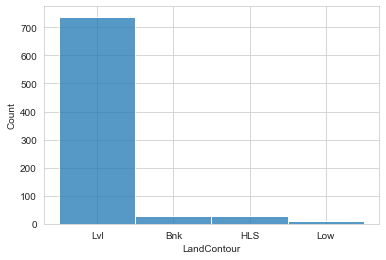

Utilities


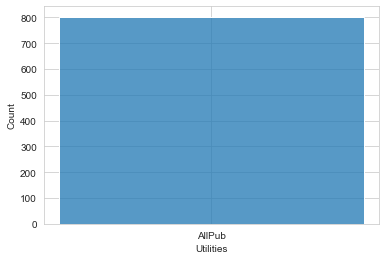

LotConfig


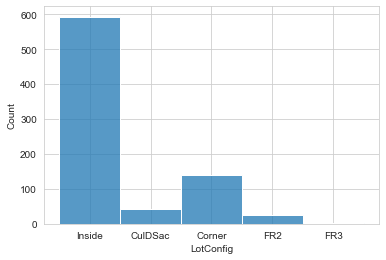

LandSlope


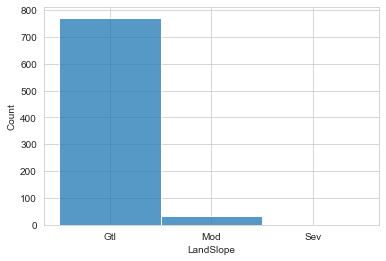

Neighborhood


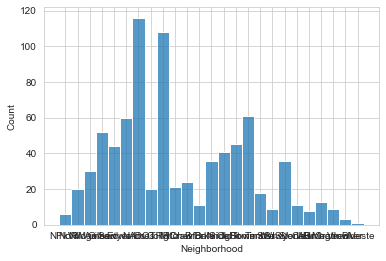

Condition1


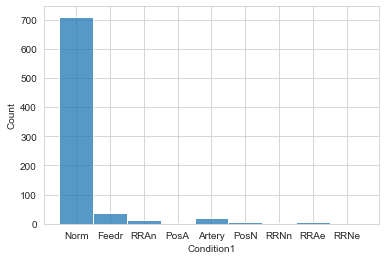

Condition2


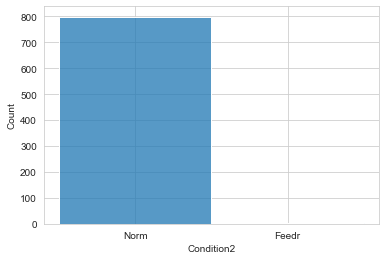

BldgType


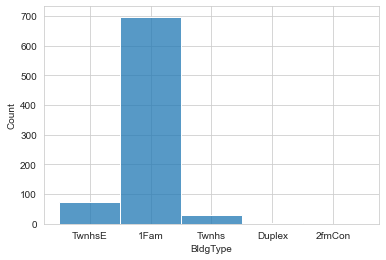

HouseStyle


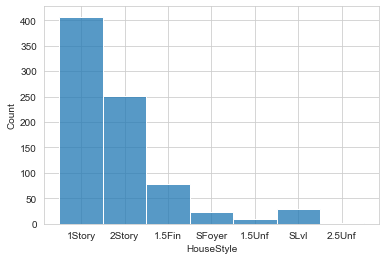

OverallQual


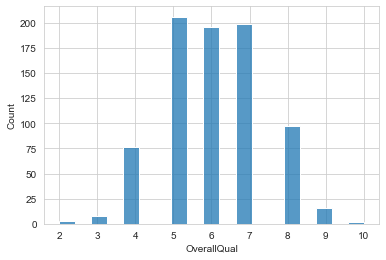

OverallCond


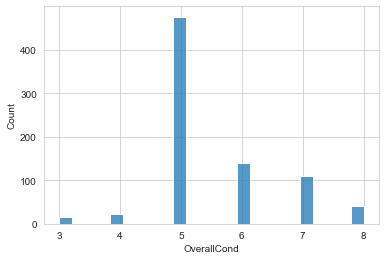

YearBuilt


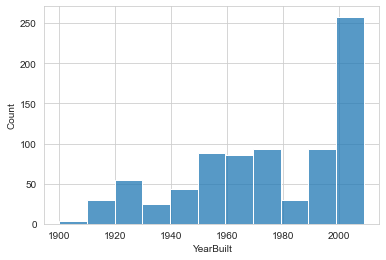

YearRemodAdd


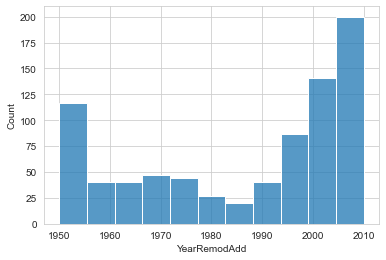

RoofStyle


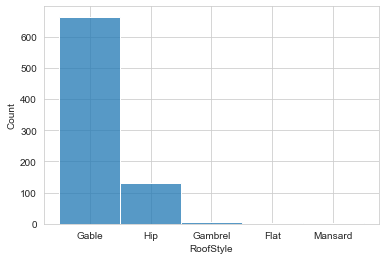

RoofMatl


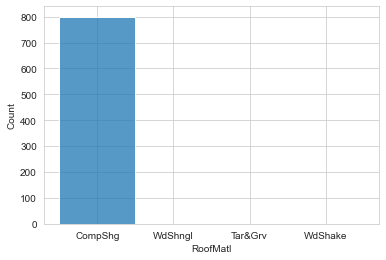

Exterior1st


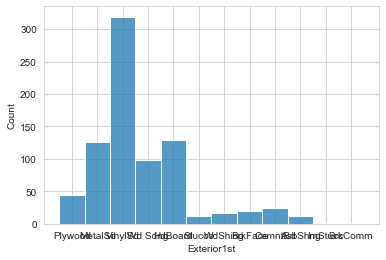

Exterior2nd


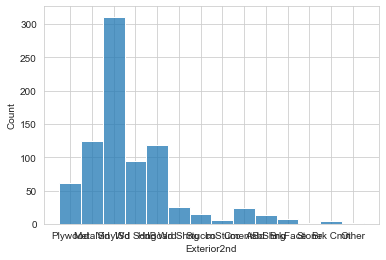

MasVnrType


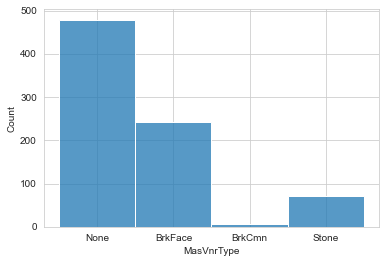

MasVnrArea


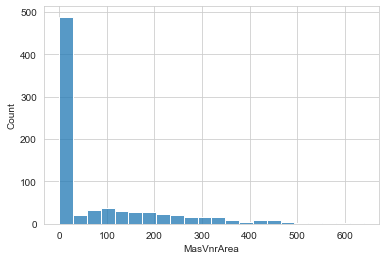

ExterQual


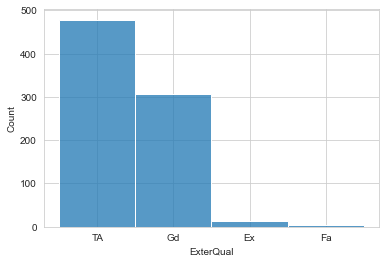

ExterCond


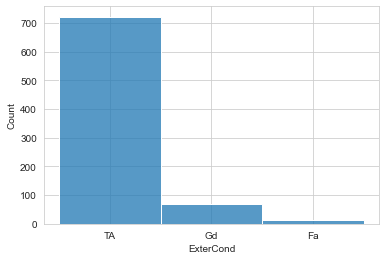

Foundation


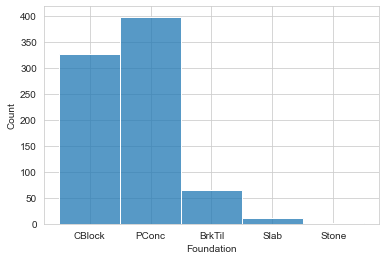

BsmtQual


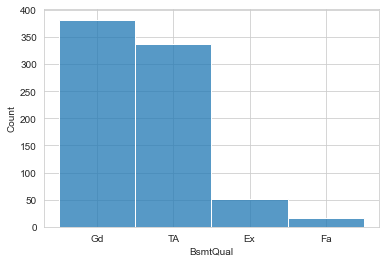

BsmtCond


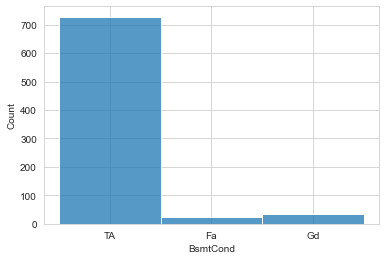

BsmtExposure


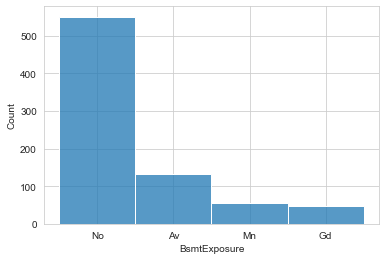

BsmtFinType1


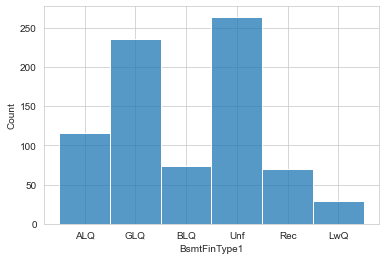

BsmtFinSF1


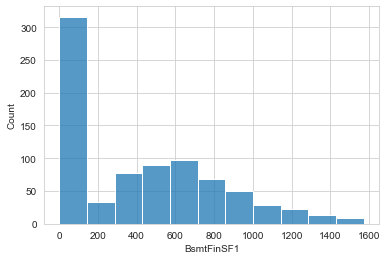

BsmtFinType2


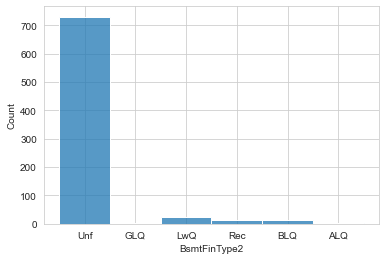

BsmtFinSF2


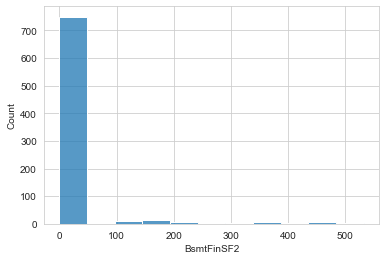

BsmtUnfSF


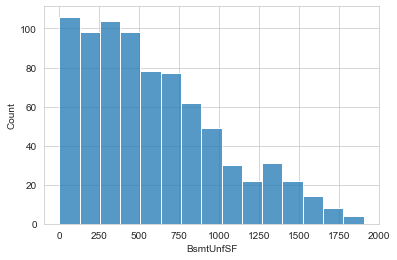

Heating


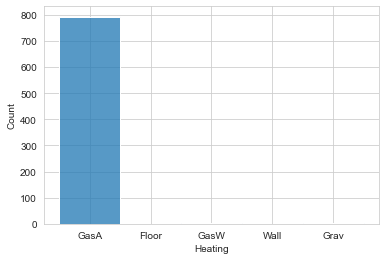

HeatingQC


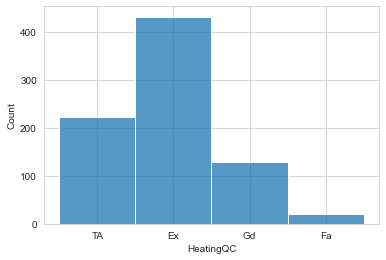

CentralAir


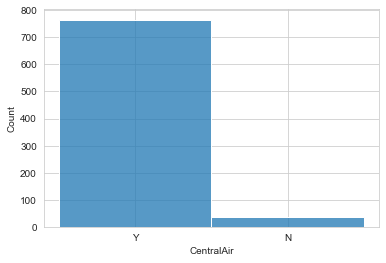

Electrical


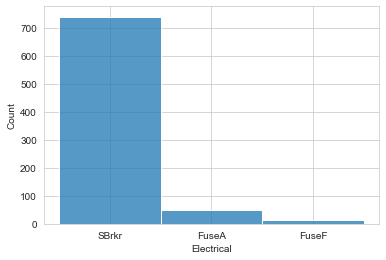

2ndFlrSF


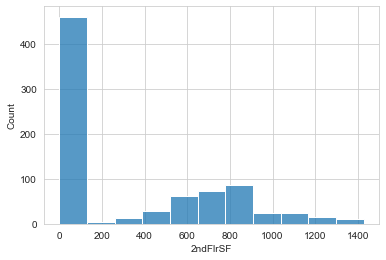

LowQualFinSF


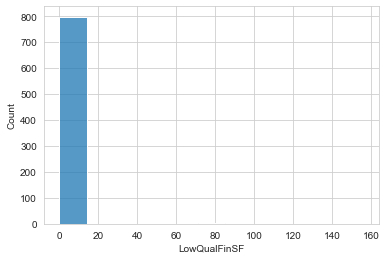

BsmtFullBath


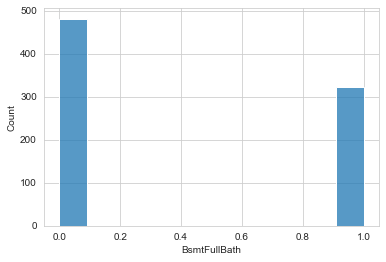

FullBath


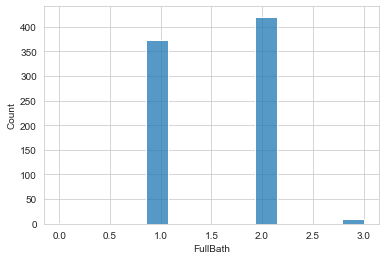

HalfBath


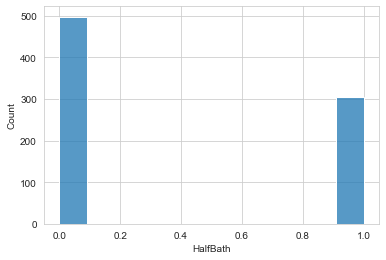

BedroomAbvGr


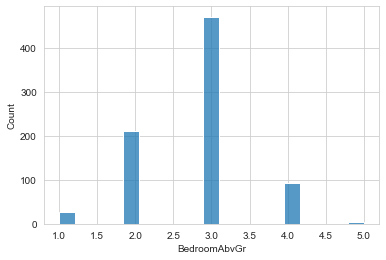

KitchenQual


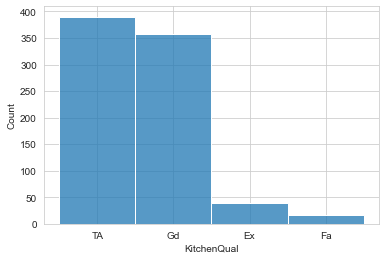

Functional


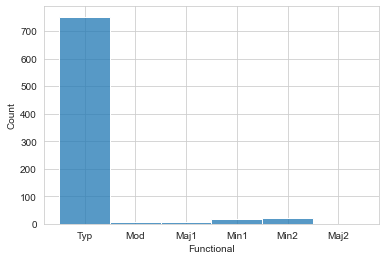

Fireplaces


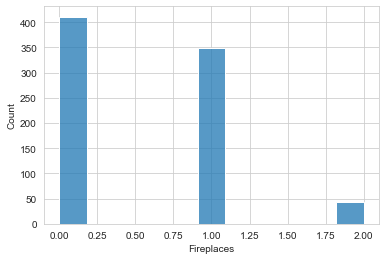

FireplaceQu


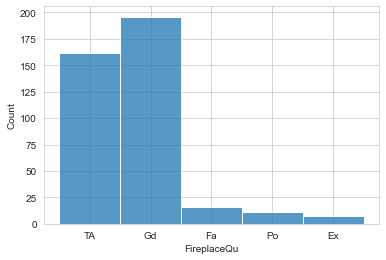

GarageType


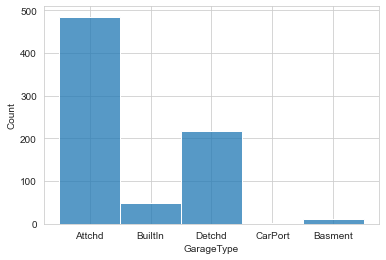

GarageYrBlt


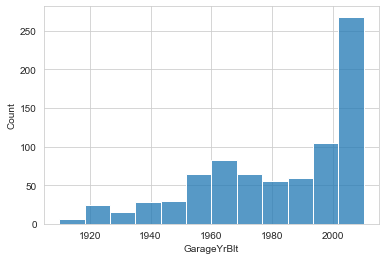

GarageFinish


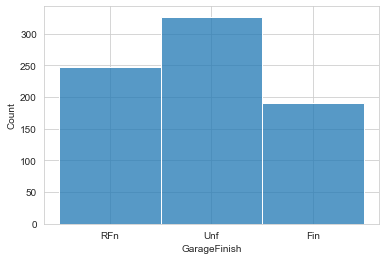

GarageQual


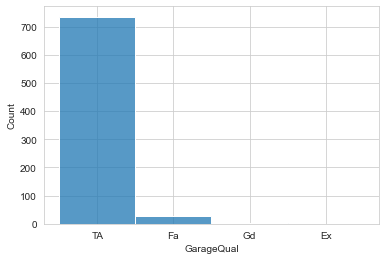

GarageCond


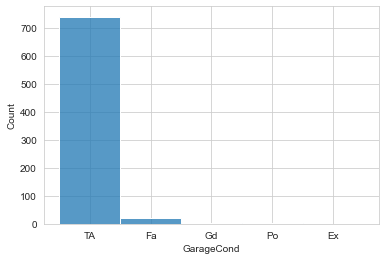

PavedDrive


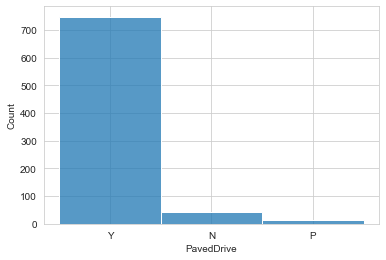

WoodDeckSF


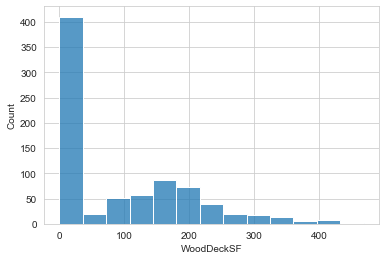

OpenPorchSF


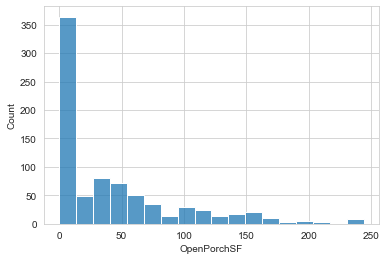

EnclosedPorch


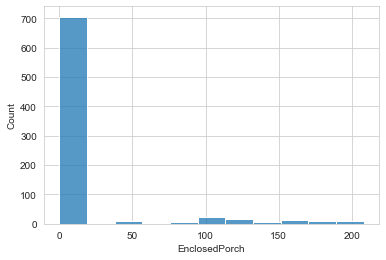

3SsnPorch


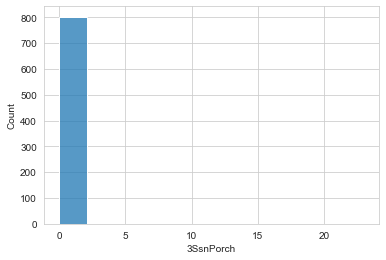

ScreenPorch


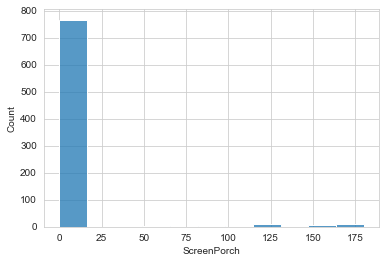

PoolQC


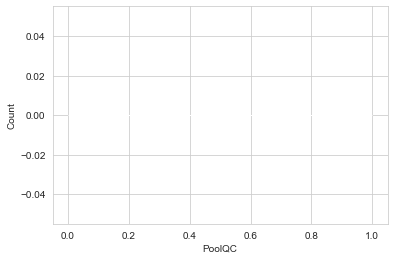

Fence


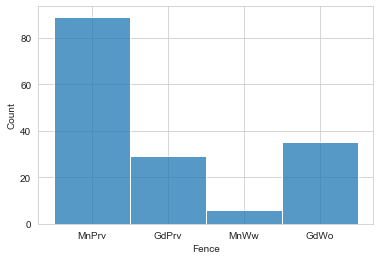

MiscFeature


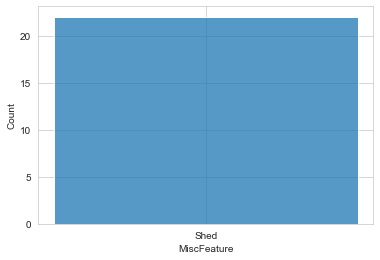

MiscVal


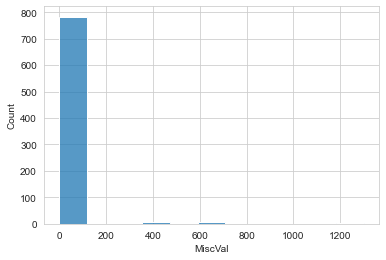

MoSold


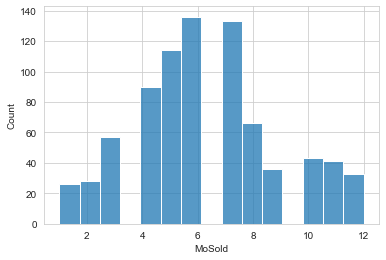

YrSold


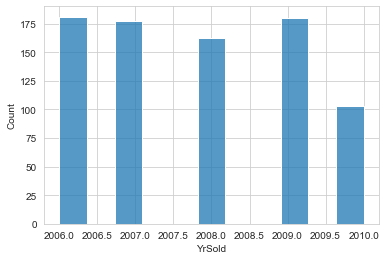

SaleType


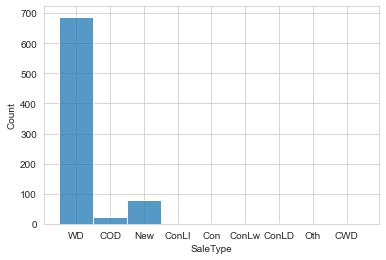

SaleCondition


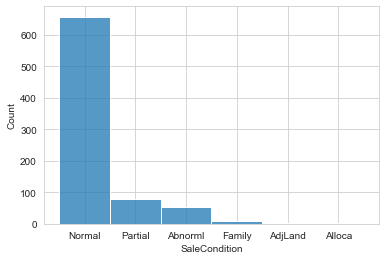

SalePrice


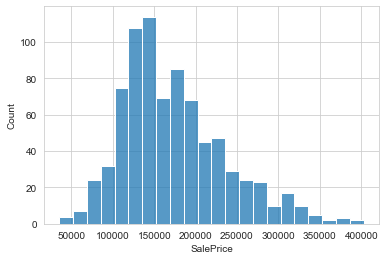

TotalBsmtSF & 1stFlrSF


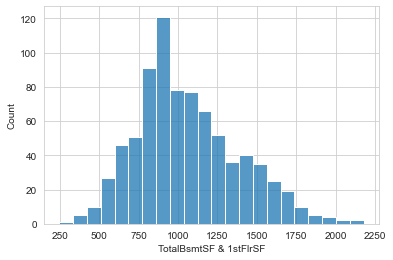

GarageCars & GarageArea


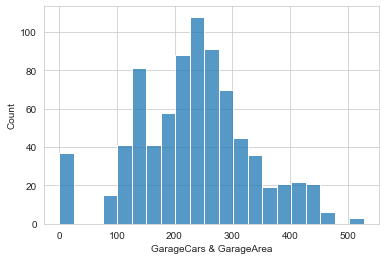

TotRmsAbvGrd & GrLivArea


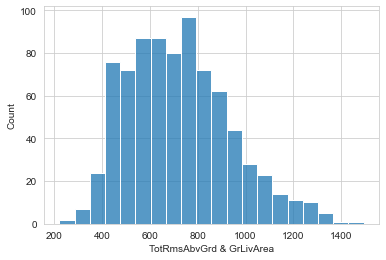

In [2463]:
#checking for skewness
for i in df.columns:
    
    sns.histplot(df[i])
    print(i)
    plt.show()

In [2464]:
df.skew()

Id                          -0.004853
MSSubClass                   1.394020
LotFrontage                  0.004547
LotArea                      0.590032
OverallQual                  0.014959
OverallCond                  0.728678
YearBuilt                   -0.583781
YearRemodAdd                -0.577825
MasVnrArea                   1.692685
BsmtFinSF1                   0.574263
BsmtFinSF2                   4.753041
BsmtUnfSF                    0.742732
2ndFlrSF                     0.737746
LowQualFinSF                15.502663
BsmtFullBath                 0.404771
FullBath                     0.032689
HalfBath                     0.496141
BedroomAbvGr                -0.159870
Fireplaces                   0.598419
GarageYrBlt                 -0.781622
WoodDeckSF                   0.945520
OpenPorchSF                  1.444519
EnclosedPorch                2.864272
3SsnPorch                   28.337255
ScreenPorch                  4.758951
PoolQC                            NaN
MiscVal     

In [2465]:
#removing skewness from the skewed features
num_features=['LotFrontage','TotalBsmtSF & 1stFlrSF', 'LotArea','TotRmsAbvGrd & GrLivArea', 'SalePrice']


for feature in num_features:
    df[feature]=np.log(df[feature])

In [2466]:
df.skew()

Id                          -0.004853
MSSubClass                   1.394020
LotFrontage                 -1.450927
LotArea                     -1.348558
OverallQual                  0.014959
OverallCond                  0.728678
YearBuilt                   -0.583781
YearRemodAdd                -0.577825
MasVnrArea                   1.692685
BsmtFinSF1                   0.574263
BsmtFinSF2                   4.753041
BsmtUnfSF                    0.742732
2ndFlrSF                     0.737746
LowQualFinSF                15.502663
BsmtFullBath                 0.404771
FullBath                     0.032689
HalfBath                     0.496141
BedroomAbvGr                -0.159870
Fireplaces                   0.598419
GarageYrBlt                 -0.781622
WoodDeckSF                   0.945520
OpenPorchSF                  1.444519
EnclosedPorch                2.864272
3SsnPorch                   28.337255
ScreenPorch                  4.758951
PoolQC                            NaN
MiscVal     

PROCEEDING TO ANALYSING THE CATEGORICAL PART

In [2467]:
df[obj_col].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
5       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
6       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      NPkVill       Norm       Norm   TwnhsE     1Story     Gable  CompShg   
2      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   
3       NWAmes       Norm       Norm     1Fam     1Story       Hip  CompShg   
5      Gilbert       Norm       Norm     1Fam     2Story     Gable  CompShg   
6       Sawyer       Norm       Norm     1Fam     1Story       Hip  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     Plywood     Plywood       None        TA        TA     CBlock       Gd   
2     MetalSd     MetalSd       None        Gd        TA      PConc       Gd   
3     Plywood     Plywood    BrkFace        TA        TA     CBlock       Gd   
5     VinylSd     VinylSd       None        Gd        TA      PConc       Gd   
6     Wd Sdng     Wd Sdng    BrkFace        TA        TA     CBlock       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          ALQ          Unf    GasA        TA   
2       TA           Av          GLQ          Unf    GasA        Ex   
3       TA           No          BLQ          Unf    GasA        Ex   
5       TA           Av          Unf          Unf    GasA        Ex   
6       TA           No          ALQ          Unf    GasA        TA   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          TA        Typ          TA     Attchd   
3          Y      SBrkr          TA        Typ          TA     Attchd   
5          Y      SBrkr          Gd        Typ          Gd    BuiltIn   
6          Y      SBrkr          TA        Mod          Gd     Detchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN    NaN         NaN   
2          Unf         TA         TA          Y    NaN    NaN         NaN   
3          RFn         TA         TA          Y    NaN  MnPrv         NaN   
5          Fin         TA         TA          Y    NaN    NaN         NaN   
6          Unf         TA         TA          Y    NaN    NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
2       WD        Normal  
3      COD        Normal  
5      New       Partial  
6       WD        Normal

In [2468]:
df[obj_col].isnull().sum()

MSZoning           0
Street             0
Alley            753
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         5
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          15
BsmtCond          15
BsmtExposure      16
BsmtFinType1      15
BsmtFinType2      15
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
KitchenQual        0
Functional         0
FireplaceQu      411
GarageType        37
GarageFinish      37
GarageQual        37
GarageCond        37
PavedDrive         0
PoolQC           803
Fence            644
MiscFeature      781
SaleType           0
SaleCondition      0
dtype: int64

MORE THAN 90% OF DATA IS MISSING IN COLUMNS:Alley,PoolQC,MiscFeature.REMOVING THESE FEATURES

In [2469]:
df.drop('Alley',axis=1,inplace=True)
df.drop('PoolQC',axis=1,inplace=True)
df.drop('MiscFeature',axis=1,inplace=True)
df.drop('Fence',axis=1,inplace=True)


In [2470]:
obj_col.pop(2)

'Alley'

In [2471]:
obj_col.pop(37)

'PoolQC'

In [2472]:
obj_col.pop(37)

'Fence'

In [2473]:
obj_col.pop(37)

'MiscFeature'

In [2474]:
df[obj_col].nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         1
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        2
BldgType          5
HouseStyle        7
RoofStyle         5
RoofMatl          4
Exterior1st      12
Exterior2nd      14
MasVnrType        4
ExterQual         4
ExterCond         3
Foundation        5
BsmtQual          4
BsmtCond          3
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           5
HeatingQC         4
CentralAir        2
Electrical        3
KitchenQual       4
Functional        6
FireplaceQu       5
GarageType        5
GarageFinish      3
GarageQual        4
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [2475]:
#using simpleimputer to handle missing values
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
missing_val=['MasVnrType','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageQual','GarageType','GarageFinish','GarageCond']
for i in missing_val:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))
df.isnull().sum()   

Id                          0
MSSubClass                  0
MSZoning                    0
LotFrontage                 0
LotArea                     0
                           ..
SaleCondition               0
SalePrice                   0
TotalBsmtSF & 1stFlrSF      0
GarageCars & GarageArea     0
TotRmsAbvGrd & GrLivArea    0
Length: 71, dtype: int64

In [2476]:
df[obj_col].isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure     16
BsmtFinType1      0
BsmtFinType2      0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
KitchenQual       0
Functional        0
FireplaceQu       0
GarageType        0
GarageFinish      0
GarageQual        0
GarageCond        0
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [2477]:
#on rechecking for missing values BsmtExposure was detected 
df['BsmtExposure']=imp.fit_transform(df['BsmtExposure'].values.reshape(-1,1))

PROCEEDING TO VISUALISING THE CATEGORICAL DATA WITH RESPECT TO THE TARGET FEATURE AND DRAWING PATTERNS

<Figure size 504x504 with 0 Axes>

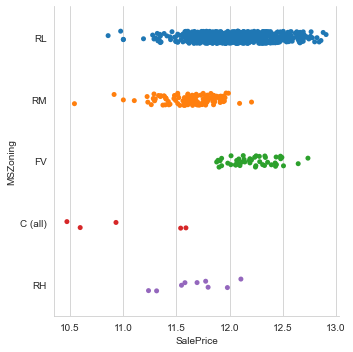

In [2478]:
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.catplot(y='MSZoning',x='SalePrice',data=df)

MSZoning: Identifies the general zoning classification of the sale.
OBSERVATIONS:
1)RL-Residential Low Density zones had the highest SalePrice amongst the 5 zones classified
2)C-Commercial,RM-Residential Medium Density zones depicted the lowest SalePrices amongst the 5 zones classified.

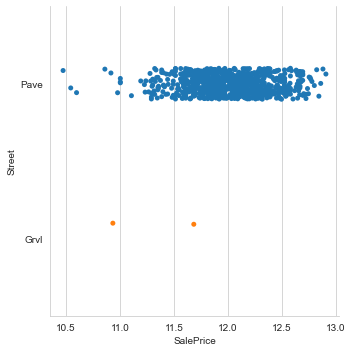

In [2479]:
#plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
sns.catplot(y='Street',x='SalePrice',data=df)

Street: Type of road access to property
OBSERVATION:
    ALMOST ALL THE PROPERTIES HAD ACCESS TO PAVED ROADS.
    PAVED(PAVE) STREETS HAD A SIGNIFICANTLY HIGHER SALEPRICE THAN GRAVEL(GRVL) STREETS.

<Figure size 504x504 with 0 Axes>

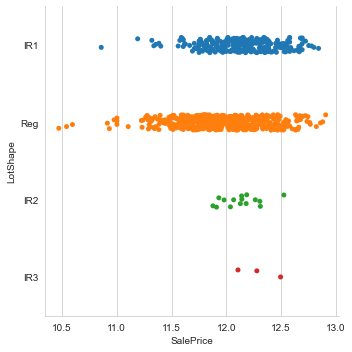

In [2480]:
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.catplot(y='LotShape',x='SalePrice',data=df)

LotShape: General shape of property
OBSERVATIONS:
1)the properties were mostly Reg-Regular and IR1-Slightly irregular types.
2)the IR1 shaped properties had a higher SalePrice than the others suceeded by Reg shaped properties.

<Figure size 504x504 with 0 Axes>

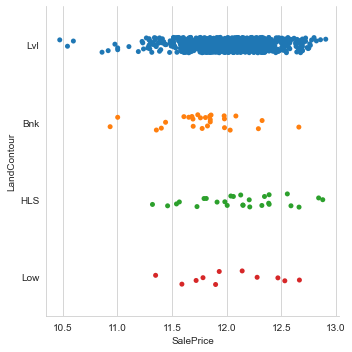

In [2481]:
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.catplot(y='LandContour',x='SalePrice',data=df)

DESCRIPTION: 
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
OBSERVATIONs:
1)The Lvl type of properties had a significantly higher saleprice than the others.
2)the Bnk type of properties had the lowest saleprice.


<Figure size 504x504 with 0 Axes>

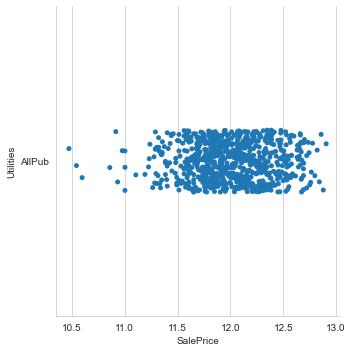

In [2482]:
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.catplot(y='Utilities',x='SalePrice',data=df)

SINCE 'Utilities' feature has only 1 unique value for all the rows,removing it:

In [2483]:
df.drop('Utilities',axis=1,inplace=True)
obj_col.pop(4)

'Utilities'

<Figure size 504x504 with 0 Axes>

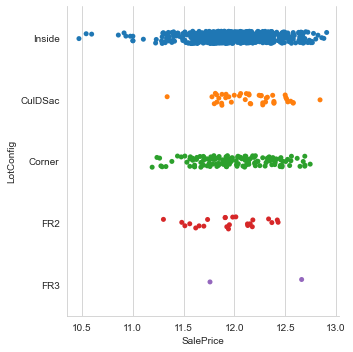

In [2484]:
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.catplot(y='LotConfig',x='SalePrice',data=df)

DESCIPTION:
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
OBSERVATIONS:
1)The 'Inside' type of (Lot configuration)properties had the highest saleprice.
2)The properties having 'FR2' type of Lot configuration had the lowest saleprice(mean).

<Figure size 504x504 with 0 Axes>

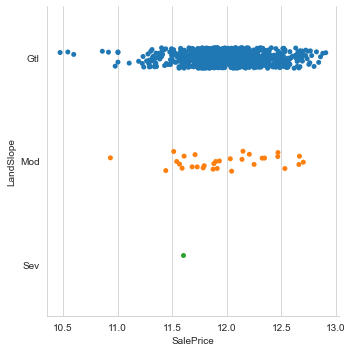

In [2485]:
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.catplot(y='LandSlope',x='SalePrice',data=df)

DESCRIPTION:
    LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
OBSERVATION:
1)most properties had a gentle slope
2)properties having a gentle slope had a higher saleprice(mean) than the others.

<Figure size 1080x1080 with 0 Axes>

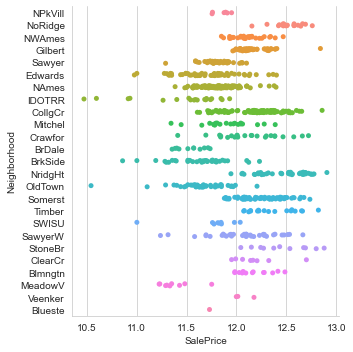

In [2486]:
plt.figure(figsize=(15,15))
sns.set_style('whitegrid')
sns.catplot(y='Neighborhood',x='SalePrice',data=df)

OBSERVATION:
    1)NoRidgE-Northridge,StoneBr-Stone Brook AND NridgHt-Northridge Heights had the highest saleprices amongst all the neighborhoods.
    2)IDOTRR-Iowa DOT and Rail Road had the lowest saleprice among all.

<Figure size 504x504 with 0 Axes>

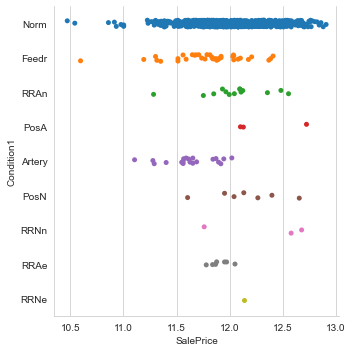

In [2487]:
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.catplot(y='Condition1',x='SalePrice',data=df)

Condition1: Proximity to various conditions
OBSERVATIONS:
1)The properties were mostly Norm-Normal category.
2)The properties under Norm-Normal category had the highest sale price.	


<Figure size 504x504 with 0 Axes>

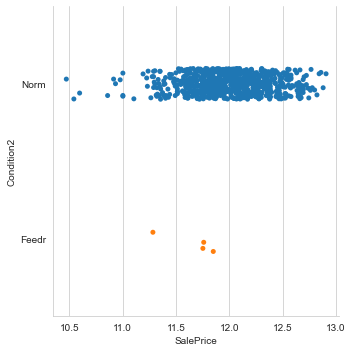

In [2488]:
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.catplot(y='Condition2',x='SalePrice',data=df)

Condition2: Proximity to various conditions (if more than one is present)
OBSERVATION:
Almost 90% of properties were under Norm category and had a the highest saleprice.

<Figure size 504x504 with 0 Axes>

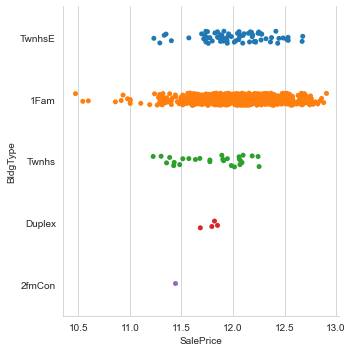

In [2489]:
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.catplot(y='BldgType',x='SalePrice',data=df)

BldgType: Type of dwelling
OBSERVATION:
The 1Fam(Single-family Detached) type of dwelling in properties had the maximum aswell as the minimum saleprice(highest range).
Also they formed the majority of the Type of dwelling in the properties.

<Figure size 504x504 with 0 Axes>

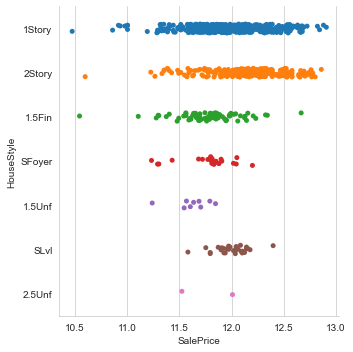

In [2490]:
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.catplot(y='HouseStyle',x='SalePrice',data=df)

DESCRIPTION:
    HouseStyle: Style of dwelling
OBSERVATION:
    1)The bulk of the properties had 1Story and 2Story type of dwelling
    2)The 2Story style of dwelling had a slightly higher mean of saleprice than the others.

<Figure size 1800x504 with 0 Axes>

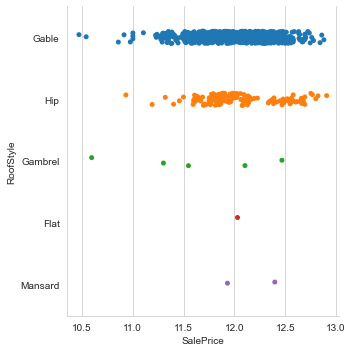

In [2491]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.catplot(y='RoofStyle',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    RoofStyle: Type of roof
OBSERVATION:
 1)The properties were mostly Gable and HIP types.
 2)The Hip type of properties had a higher mean sale price than the others.
 

<Figure size 1800x504 with 0 Axes>

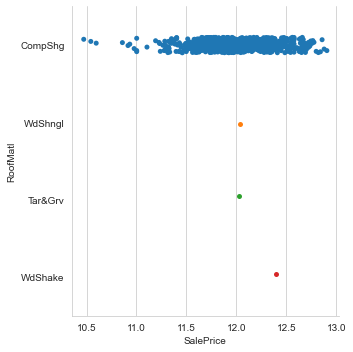

In [2492]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.catplot(y='RoofMatl',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    RoofMatl: Roof material
OBSERVATION:
    Almost all the properties had CompShg	Standard (Composite) Shingle type of roof material 

<Figure size 1800x504 with 0 Axes>

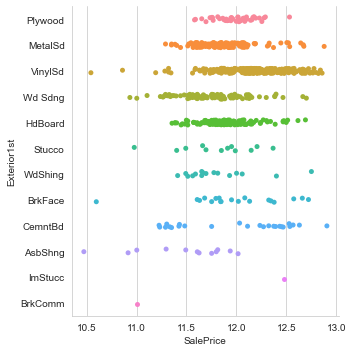

In [2493]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.catplot(y='Exterior1st',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    Exterior1st: Exterior covering on house
OBSERVATION:
    The VinylSd	Vinyl Siding had the highest mean sale price among all the exterior categories followed by MetalSd	Metal Siding.
    2)The AsbShng	Asbestos Shingles had the lowest sale price(mean) among all.

<Figure size 1800x504 with 0 Axes>

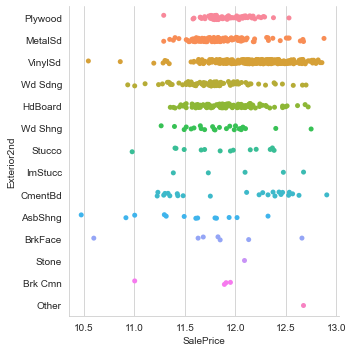

In [2494]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.catplot(y='Exterior2nd',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    Exterior2nd: Exterior covering on house (if more than one material)
    OBSERVATIONS:
    1)The VinylSd	Vinyl Siding had the highest mean sale price among all the exterior2 categories followed by MetalSd	Metal Siding.
    2)The AsbShng	Asbestos Shingles had the lowest sale price(mean) among all.

<Figure size 1800x504 with 0 Axes>

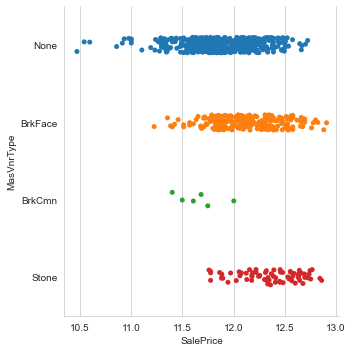

In [2495]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.catplot(y='MasVnrType',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    MasVnrType: Masonry veneer type
OBSERVATION:
    1)The Stone type of Masonry had the highest SalePrice(mean)
    2)The BrkCmn had the lowest mean saleprice.

<Figure size 1800x504 with 0 Axes>

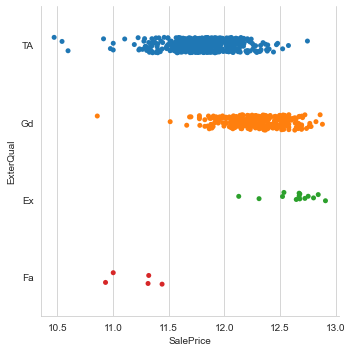

In [2496]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.catplot(y='ExterQual',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    ExterQual: Evaluates the quality of the material on the exterior 
   OBSERVATION:
   1)The Ex-Excellent type of material quality had the highest saleprice(mean) followed by the Gd-good type.
   2)Ta had the lowest saleprice and Fa had the lowest mean sale price.

<Figure size 1800x504 with 0 Axes>

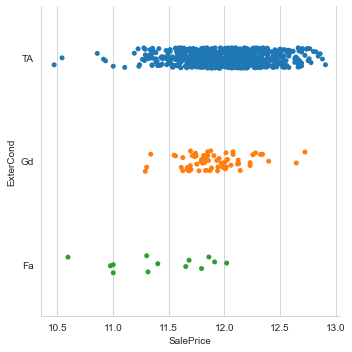

In [2497]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.catplot(y='ExterCond',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    ExterCond: Evaluates the present condition of the material on the exterior
OBSERVATION:
The majority of the properties had the TA type of ExterCond.The TA also had the highest mean SalePrice. 

<Figure size 1800x504 with 0 Axes>

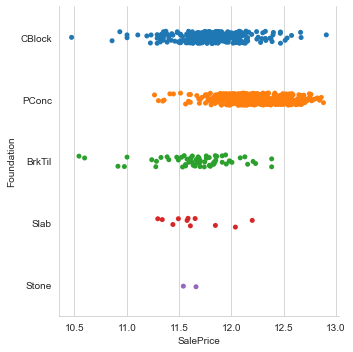

In [2498]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.catplot(y='Foundation',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    Foundation: Type of foundation
OBSERVATION:
    1)The properties with PConc	Poured Contrete type of foundation had the highest saleprice(mean).
    2)The BrkTil type of foundation had the lowest saleprice.

<Figure size 1800x504 with 0 Axes>

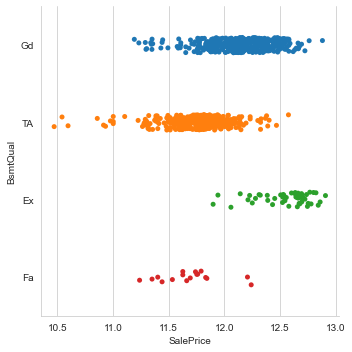

In [2499]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.catplot(y='BsmtQual',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    BsmtQual: Evaluates the height of the basement
OBSERVATION:
    The properties with Ex-(Excellent (100+ inches)) height had the highest sale price(mean).
    

<Figure size 1800x504 with 0 Axes>

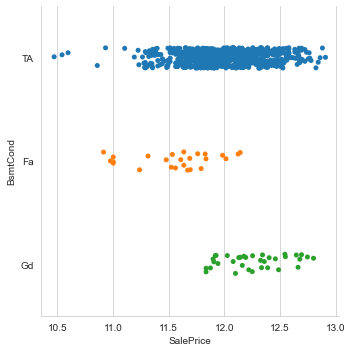

In [2500]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.catplot(y='BsmtCond',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    BsmtCond: Evaluates the general condition of the basement
OBSERVATION:
    TA type of condition had the highest saleprice whereas Gd category had the highest mean saleprice.
    The majority of the cases were of TA category.
            

<Figure size 1800x504 with 0 Axes>

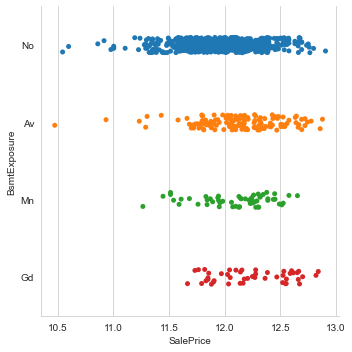

In [2501]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.catplot(y='BsmtExposure',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    BsmtExposure: Refers to walkout or garden level walls
OBSERVATION:
The Gd type of properties had the highest SalePrice(mean).

<Figure size 1800x504 with 0 Axes>

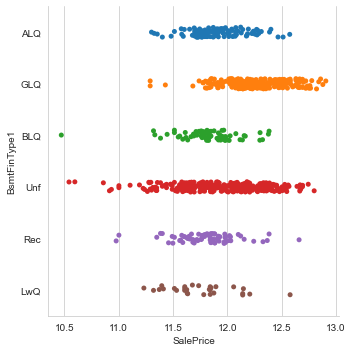

In [2502]:
plt.figure(figsize=(25,7))
sns.set_style('whitegrid')
sns.catplot(y='BsmtFinType1',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    BsmtFinType1: Rating of basement finished area
        OBSERVATION:
            The GLQ(Good Living Quarters) had the highest saleprice(mean aswell as maximum)

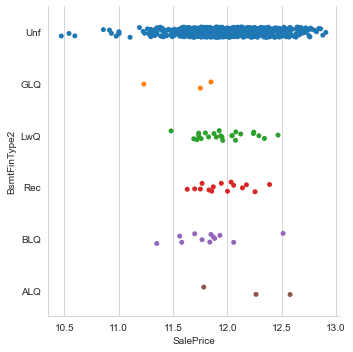

In [2503]:
sns.set_style('whitegrid')
sns.catplot(y='BsmtFinType2',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    BsmtFinType2: Rating of basement finished area (if multiple types)
OBSERVATION:
    Majority of properties had Unf	Unfinshed type of  BsmtFinType2 which also had the highest saleprice.

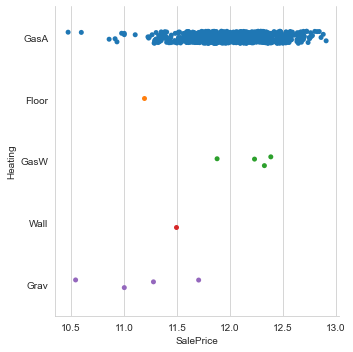

In [2504]:
sns.set_style('whitegrid')
sns.catplot(y='Heating',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    Heating: Type of heating
        OBSERVATION:
    1)Most properties had a GasA(Gas forced warm air furnace) type of heating which also had the highest SalePrice.

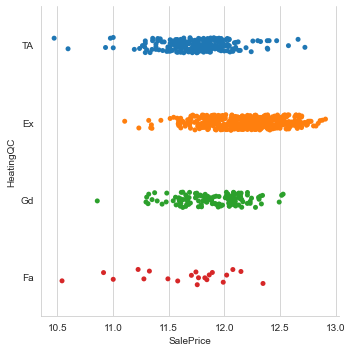

In [2505]:
sns.set_style('whitegrid')
sns.catplot(y='HeatingQC',x='SalePrice',data=df)
plt.show()

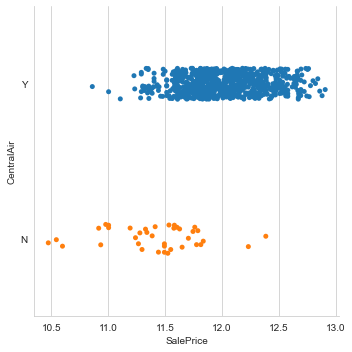

In [2506]:
sns.set_style('whitegrid')
sns.catplot(y='CentralAir',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    CentralAir: Central air conditioning
OBSERVATION:
    1)Most properties had central air conditioning.
    2)properties with central air conditioning had the highest saleprice.

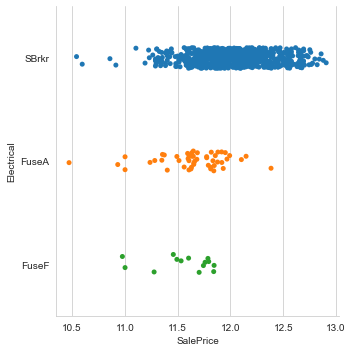

In [2507]:
sns.set_style('whitegrid')
sns.catplot(y='Electrical',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    Electrical: Electrical system
OBSERVATION:
    1)Majority of the properties had SBrkr	Standard Circuit Breakers & Romex type of electrical system.
    2)SBrkr	Standard Circuit Breakers & Romex type of electrical system had the highest sale price.(mean aswell as maximum)

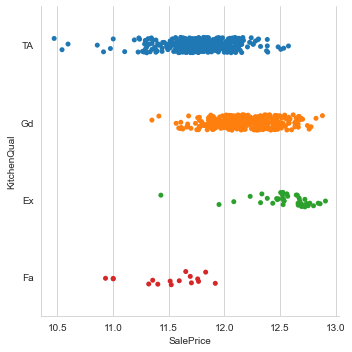

In [2508]:
sns.set_style('whitegrid')
sns.catplot(y='KitchenQual',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    KitchenQual: Kitchen quality
OBSERVATION:
    1)The Ex type of kitchen quality had the highest saleprice(mean aswell as maximum).
    2)The Fa type of kitchen quality had the lowest SalePrice(minimum).

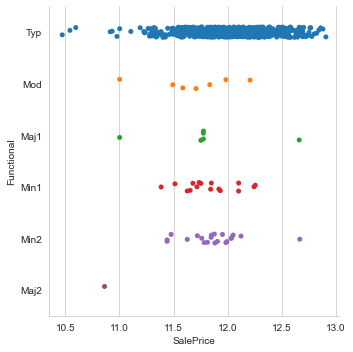

In [2509]:
sns.set_style('whitegrid')
sns.catplot(y='Functional',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    Functional: Home functionality (Assume typical unless deductions are warranted)
OBSERVATIONS:
    1)Most properties had Typ	Typical Functionality.
    2)Typ	Typical Functionality had the highest sale price among all.

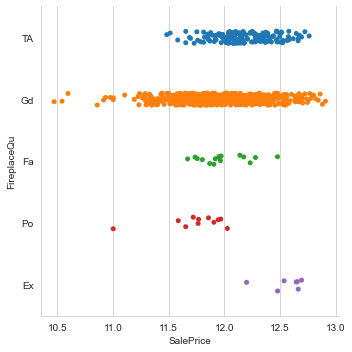

In [2510]:
sns.set_style('whitegrid')
sns.catplot(y='FireplaceQu',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    FireplaceQu: Fireplace quality
OBSERVATION:
    1)The properties having Ex type of quality had the highest mean saleprice.
    2)The properties having Po type of quality had the lowest saleprice(mean).

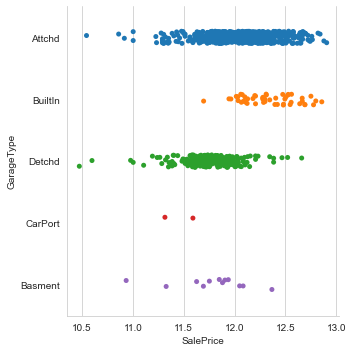

In [2511]:
sns.set_style('whitegrid')
sns.catplot(y='GarageType',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    GarageType: Garage location
OBSERVATION:
    1)BuiltIn	Built-In (Garage part of house - typically has room above garage) had the highest SalePrice(mean) among all the locations.
    2)The maximum saleprice was recorded in Attchd	Attached to home location.

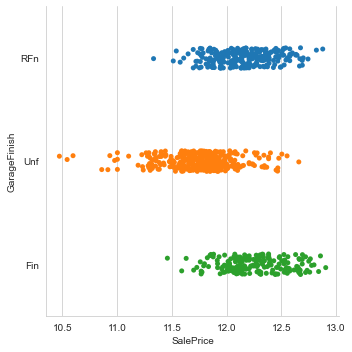

In [2512]:
sns.set_style('whitegrid')
sns.catplot(y='GarageFinish',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    GarageFinish: Interior finish of the garage
OBSERVATION:
    1)The properties with Un(Unfinished) GarageFinish had the lowest SalePrice.
    2)RFn(Rough Finished) and Fin(Finished) had similar means of SalePrice but Fin category had a slightly higher mean.

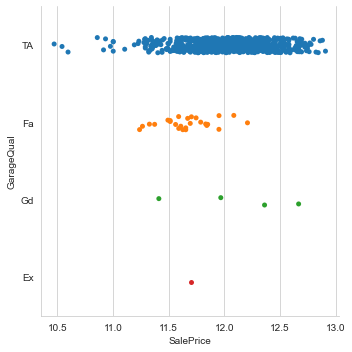

In [2513]:
sns.set_style('whitegrid')
sns.catplot(y='GarageQual',x='SalePrice',data=df)
plt.show()

OBSERVATION:
    MAJORITY OF THE PROPERTIES HAD TA(Typical/Average) CONDITION.

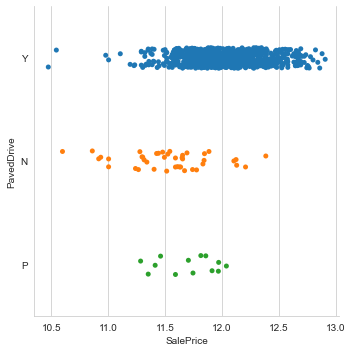

In [2514]:
sns.set_style('whitegrid')
sns.catplot(y='PavedDrive',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    PavedDrive: Paved driveway
OBSERVATION:
    The properties with Y(Paved) driveways had the highest SalePrice(mean aswell as maximum) and also constituted bulk of the sample.

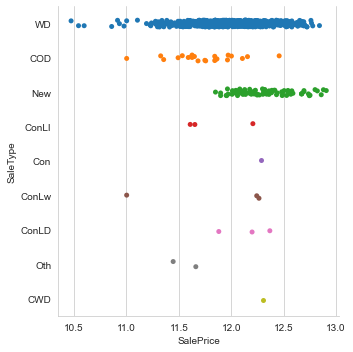

In [2515]:
sns.set_style('whitegrid')
sns.catplot(y='SaleType',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    SaleType: Type of sale
OBSERVATION:
    1)The SaleType New(Home just constructed and sold) had the highest saleprice(mean aswell as maximum).
    2)Majority of sales were of WD,New,COD type.(descending order)

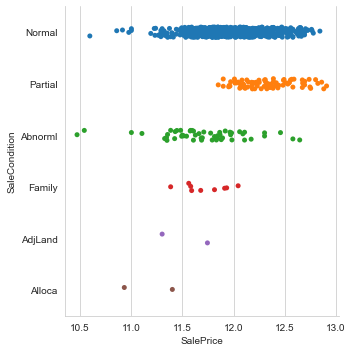

In [2516]:
sns.set_style('whitegrid')
sns.catplot(y='SaleCondition',x='SalePrice',data=df)
plt.show()

DESCRIPTION:
    SaleCondition: Condition of sale
OBSERVATION:
    The SaleCondition Partial(Home was not completed when last assessed (associated with New Homes)) had the highest SalePrice(mean as well as maximum).
    

In [2517]:
df.skew()

Id                          -0.004853
MSSubClass                   1.394020
LotFrontage                 -1.450927
LotArea                     -1.348558
OverallQual                  0.014959
OverallCond                  0.728678
YearBuilt                   -0.583781
YearRemodAdd                -0.577825
MasVnrArea                   1.692685
BsmtFinSF1                   0.574263
BsmtFinSF2                   4.753041
BsmtUnfSF                    0.742732
2ndFlrSF                     0.737746
LowQualFinSF                15.502663
BsmtFullBath                 0.404771
FullBath                     0.032689
HalfBath                     0.496141
BedroomAbvGr                -0.159870
Fireplaces                   0.598419
GarageYrBlt                 -0.781622
WoodDeckSF                   0.945520
OpenPorchSF                  1.444519
EnclosedPorch                2.864272
3SsnPorch                   28.337255
ScreenPorch                  4.758951
MiscVal                      8.100346
MoSold      

THE FEATURES DEPICTING SKEWNESS ARE MOSTLY OF CATEGORICAL TYPE,HENCE NOT REMOVING SKEWNESS FROM THEM.

PROCEEDING TO ANALYSING THE TEST DATA FOR MISSING VALUES ETC.

In [2518]:
df_test=pd.read_csv('pfa_housing_test.csv',sep='\t')
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0           HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1           Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3           Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4           Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   
..          ...       ...       ...       ...          ...        ...   
287         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
288         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
289         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
290         Lvl    AllPub    Corner       Gtl      BrkSide      Feedr   
291         Lvl    AllPub    Inside       Gtl       BrDale       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         Norm     1Fam     1Story            9            5       2005   
1         Norm   TwnhsE     1Story            8            5       1984   
2         Norm     1Fam     1Story            8            5       2001   
3         Norm     1Fam     2Story            7            7       1941   
4         Norm     1Fam     2Story            6            5       2007   
..         ...      ...        ...          ...          ...        ...   
287       Norm     1Fam     1Story            8            5       2007   
288       Norm     1Fam     1Story            5            5       1994   
289       Norm     1Fam     1Story            6            7       1970   
290       Norm     1Fam     1.5Fin            6            7       1947   
291       Norm    Twnhs     2Story            6            5       1973   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1            1984     Gable  CompShg     HdBoard     HdBoard       None   
2            2001       Hip  CompShg     VinylSd     VinylSd       None   
3            1950     Gable  CompShg     MetalSd     MetalSd       None   
4            2007     Gable  CompShg     VinylSd     VinylSd      Stone   
..            ...       ...      ...         ...         ...        ...   
287          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
288          1995     Gable  CompShg     VinylSd     VinylSd       None   
289          1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
290          1950     Gable  CompShg     CemntBd     CmentBd       None   
291          1973     Gable  CompShg     HdBoard     HdBoard    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         200.0        Gd        TA      PConc       Ex       TA           Gd   
1           0.0        Gd        TA     CBlock       Gd       TA           Av   
2           0.0        Gd        TA      PConc       Gd       TA           Av   
3           0.0        TA        TA     CBlock       TA       TA   

PERFORMING THE SAME ANALYSIS AND FEATURE ENGINEERING AS DONE ON TRAINING DATA

In [2519]:
df_test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

SEPARATING THE NUMERICAL FROM THE OBJECT TYPES

In [2520]:
test_obj=[]
test_num=[]
for i in df_test.columns:
    if(df_test[i].dtypes=='object'):
        test_obj.append(i)
    else:
        test_num.append(i)
print(len(test_obj))
print(len(test_num))
    


42
38


In [2521]:
df_test[test_num].isnull().sum()

Id                 0
MSSubClass         0
LotFrontage       45
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         1
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       17
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
PoolQC           292
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [2522]:
#dropping PoolQC as it has all its values missing
df_test.drop('PoolQC',axis=1,inplace=True)

In [2523]:
df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())
df_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

In [2524]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df_test['GarageYrBlt']=imp.fit_transform(df_test['GarageYrBlt'].values.reshape(-1,1))

In [2525]:
test_num.pop(34)

'PoolQC'

In [2526]:
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean)

In [2527]:
df_test[test_num].isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

HANDLING THE CATEGORICAL FEATURES

In [2528]:
df_test['MasVnrArea'].dtypes

dtype('O')

In [2529]:
df_test[test_obj].isnull().sum()

MSZoning           0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinType2       7
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      139
GarageType        17
GarageFinish      17
GarageQual        17
GarageCond        17
PavedDrive         0
Fence            248
MiscFeature      282
SaleType           0
SaleCondition      0
dtype: int64

DROPPING THE FEATURES WITH MORE THAN 50% DATA MISSING AND WERE DROPPED FROM THE TRAINING SET TOO

In [2530]:
df_test.drop('Alley',axis=1,inplace=True)
#df_test.drop('PoolQC',axis=1,inplace=True)
df_test.drop('MiscFeature',axis=1,inplace=True)
df_test.drop('Fence',axis=1,inplace=True)


In [2531]:
test_obj.pop(2)

'Alley'

In [2532]:
test_obj.pop(37)

'Fence'

In [2533]:
test_obj.pop(37)

'MiscFeature'

In [2534]:
#using simpleimputer to handle missing values
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
missing_val=['MasVnrType','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageQual','GarageType','GarageFinish','GarageCond','BsmtExposure','Electrical']
for i in missing_val:
    df_test[i]=imp.fit_transform(df_test[i].values.reshape(-1,1))
df_test.isnull().sum()   

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 76, dtype: int64

In [2535]:
df_test[test_obj].isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [2536]:
df_test[test_obj].nunique()


MSZoning          4
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     24
Condition1        8
Condition2        2
BldgType          5
HouseStyle        8
RoofStyle         5
RoofMatl          3
Exterior1st      12
Exterior2nd      14
MasVnrType        4
ExterQual         4
ExterCond         4
Foundation        6
BsmtQual          4
BsmtCond          3
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           4
HeatingQC         4
CentralAir        2
Electrical        4
KitchenQual       4
Functional        6
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          6
SaleCondition     4
dtype: int64

In [2537]:
df[obj_col].nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        2
BldgType          5
HouseStyle        7
RoofStyle         5
RoofMatl          4
Exterior1st      12
Exterior2nd      14
MasVnrType        4
ExterQual         4
ExterCond         3
Foundation        5
BsmtQual          4
BsmtCond          3
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           5
HeatingQC         4
CentralAir        2
Electrical        3
KitchenQual       4
Functional        6
FireplaceQu       5
GarageType        5
GarageFinish      3
GarageQual        4
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [2538]:
df_test['TotalBsmtSF & 1stFlrSF']=(df_test['TotalBsmtSF']+df_test['1stFlrSF'])/2
df_test['GarageCars & GarageArea']=(df_test['GarageCars']+df_test['GarageArea'])/2
df_test['TotRmsAbvGrd & GrLivArea']=(df_test['TotRmsAbvGrd']+df_test['GrLivArea'])/2


In [2539]:
drop_list=['TotalBsmtSF','1stFlrSF','GarageCars','GarageArea','TotRmsAbvGrd','GrLivArea']
for i in drop_list:
    df_test.drop(i,axis=1,inplace=True)
    


In [2540]:
df_test.drop('PoolArea',axis=1,inplace=True)
df_test.drop('BsmtHalfBath',axis=1,inplace=True)
df_test.drop('KitchenAbvGr',axis=1,inplace=True)


In [2541]:
df_test.drop('Utilities',axis=1,inplace=True)

APPARENTLY A LOT OF FEATURES HAVE DIFFERENT NUMBER OF UNIQUE VALUES IN THE TEST DATASET THAN THE TRAIN DATASET.So it is best that we combine them for encoding.

In [2542]:
frames=[df.drop('SalePrice',axis=1),df_test]
df_final=pd.concat(frames,axis=0)
df_final

Id  MSSubClass MSZoning  LotFrontage       LotArea Street LotShape  \
0     127         120       RL     4.262517      8.502689   Pave      IR1   
2     793          60       RL     4.521789      9.202308   Pave      IR1   
3     110          20       RL     4.653960      9.371694   Pave      IR1   
5    1197          60       RL     4.060443      9.550662   Pave      IR1   
6     561          20       RL     4.262517      9.336180   Pave      IR1   
..    ...         ...      ...          ...           ...    ...      ...   
287    83          20       RL    78.000000  10206.000000   Pave      Reg   
288  1048          20       RL    57.000000   9245.000000   Pave      IR2   
289    17          20       RL    66.425101  11241.000000   Pave      IR1   
290   523          50       RM    50.000000   5000.000000   Pave      Reg   
291  1379         160       RM    21.000000   1953.000000   Pave      Reg   

    LandContour LotConfig LandSlope Neighborhood Condition1 Condition2  \
0           Lvl    Inside       Gtl      NPkVill       Norm       Norm   
2           Lvl   CulDSac       Gtl      NoRidge       Norm       Norm   
3           Lvl    Inside       Gtl       NWAmes       Norm       Norm   
5           Lvl    Inside       Gtl      Gilbert       Norm       Norm   
6           Lvl    Inside       Gtl       Sawyer       Norm       Norm   
..          ...       ...       ...          ...        ...        ...   
287         Lvl    Inside       Gtl      Somerst       Norm       Norm   
288         Lvl    Inside       Gtl      CollgCr       Norm       Norm   
289         Lvl   CulDSac       Gtl        NAmes       Norm       Norm   
290         Lvl    Corner       Gtl      BrkSide      Feedr       Norm   
291         Lvl    Inside       Gtl       BrDale       Norm       Norm   

    BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     TwnhsE     1Story            6            5       1976          1976   
2       1Fam     2Story            7            5       1996          1997   
3       1Fam     1Story            6            6       1977          1977   
5       1Fam     2Story            7            5       2006          2006   
6       1Fam     1Story            5            6       1957          1996   
..       ...        ...          ...          ...        ...           ...   
287     1Fam     1Story            8            5       2007          2007   
288     1Fam     1Story            5            5       1994          1995   
289     1Fam     1Story            6            7       1970          1970   
290     1Fam     1.5Fin            6            7       1947          1950   
291    Twnhs     2Story            6            5       1973          1973   

    RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType MasVnrArea  \
0       Gable  CompShg     Plywood     Plywood       None          0   
2       Gable  CompShg     MetalSd     MetalSd       None          0   
3         Hip  CompShg     Plywood     Plywood    BrkFace        480   
5       Gable  CompShg     VinylSd     VinylSd       None          0   
6         Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace        180   
..        ...      ...         ...         ...        ...        ...   
287     Gable  CompShg     VinylSd     VinylSd      Stone        468   
288     Gable  CompShg     VinylSd     VinylSd       None          0   
289     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace        180   
290     Gable  CompShg     CemntBd     CmentBd       None          0   
291     Gable  CompShg     HdBoard     HdBoard    BrkFace        408   

    ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0          TA        TA     CBlock       Gd       TA           No   
2          Gd        TA      PConc       Gd       TA           Av   
3          TA        TA     CBlock       Gd       TA           No   
5          Gd        TA      PConc       Gd       TA           Av   
6          TA        TA     CBlock       Gd   

In [2543]:
df_final.drop('MasVnrArea',axis=1,inplace=True)

In [2544]:
def one_hot_encode(feature):
    ordinal=pd.get_dummies(df_final[feature],drop_first=True)
    return ordinal

In [2545]:
df_new=pd.DataFrame()
for i in df_final.columns:
    if (df_final[i].nunique()<=25)&(df_final[i].dtypes=='object'):
        ordinal=one_hot_encode(i)
        for j in ordinal.columns:
            
            df_new[j]=ordinal[j]
    else:
        df_new[i]=df_final[i]
df_new
        
        
        
        
        
        
        

Id  MSSubClass  FV  RH  RL  RM  LotFrontage       LotArea  Pave  IR2  \
0     127         120   0   0   1   0     4.262517      8.502689     1    0   
2     793          60   0   0   1   0     4.521789      9.202308     1    0   
3     110          20   0   0   1   0     4.653960      9.371694     1    0   
5    1197          60   0   0   1   0     4.060443      9.550662     1    0   
6     561          20   0   0   1   0     4.262517      9.336180     1    0   
..    ...         ...  ..  ..  ..  ..          ...           ...   ...  ...   
287    83          20   0   0   1   0    78.000000  10206.000000     1    0   
288  1048          20   0   0   1   0    57.000000   9245.000000     1    1   
289    17          20   0   0   1   0    66.425101  11241.000000     1    0   
290   523          50   0   0   0   1    50.000000   5000.000000     1    0   
291  1379         160   0   0   0   1    21.000000   1953.000000     1    0   

     IR3  Reg  HLS  Low  Lvl  CulDSac  FR2  FR3  Inside  Mod  Sev  Blueste  \
0      0    0    0    0    1        0    0    0       1    0    0        0   
2      0    0    0    0    1        1    0    0       0    0    0        0   
3      0    0    0    0    1        0    0    0       1    0    0        0   
5      0    0    0    0    1        0    0    0       1    0    0        0   
6      0    0    0    0    1        0    0    0       1    1    0        0   
..   ...  ...  ...  ...  ...      ...  ...  ...     ...  ...  ...      ...   
287    0    1    0    0    1        0    0    0       1    0    0        0   
288    0    0    0    0    1        0    0    0       1    0    0        0   
289    0    0    0    0    1        1    0    0       0    0    0        0   
290    0    1    0    0    1        0    0    0       0    0    0        0   
291    0    1    0    0    1        0    0    0       1    0    0        0   

     BrDale  BrkSide  ClearCr  CollgCr  Crawfor  Edwards  Gilbert  IDOTRR  \
0         0        0        0        0        0        0        0       0   
2         0        0        0        0        0        0        0       0   
3         0        0        0        0        0        0        0       0   
5         0        0        0        0        0        0        1       0   
6         0        0        0        0        0        0        0       0   
..      ...      ...      ...      ...      ...      ...      ...     ...   
287       0        0        0        0        0        0        0       0   
288       0        0        0        1        0        0        0       0   
289       0        0        0        0        0        0        0       0   
290       0        1        0        0        0        0        0       0   
291       1        0        0        0        0        0        0       0   

     MeadowV  Mitchel  NAmes  NPkVill  NWAmes  NoRidge  NridgHt  OldTown  \
0          0        0      0        1       0        0        0        0   
2          0        0      0        0       0        1        0        0   
3          0        0      0        0       1        0        0        0   
5          0        0      0        0       0        0        0        0   
6          0        0      0        0       0        0        0        0   
..       ...      ...    ...      ...     ...      ...      ...      ...   
287        0        0      0        0       0        0        0        0   
288        0        0      0        0       0        0        0        0   
289        0        0      1        0       0        0        0        0   
290        0        0      0        0       0        0        0        0   
291        0        0      0        0       0        0        0        0   

     SWISU  Sawyer  SawyerW  Somerst  StoneBr  Timber  Veenker  Feedr  Norm  \
0        0       0        0        0        0       0        0      0     1   
2        0       0        0        0        0       0        0      0     1   
3        0       0        0        0        0 

In [2546]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 0 to 291
Columns: 162 entries, Id to TotRmsAbvGrd & GrLivArea
dtypes: float64(6), int64(24), uint8(132)
memory usage: 406.3 KB


In [2547]:
test_obj.pop(4)

'Utilities'

In [2548]:
#checking if any column that's not visible was left out while encoding
for i in df_new.columns:
    if(df_new[i].dtypes=='object'):
        print('left out:',i)

SCALING THE DATA USING MIN-MAX-SCALER

In [2390]:
from sklearn.preprocessing import MinMaxScaler

In [2391]:
mms= MinMaxScaler()
mms.fit(df_new)
mms_scale=mms.transform(df_new)


spca=pd.DataFrame(data=mms_scale,columns=df_new.columns)
spca

Id   30   40   45   50   60   70   75   80   85   90  120  160  \
0     0.086538  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
1     0.543956  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2     0.074863  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     0.821429  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4     0.384615  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1090  0.056319  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1091  0.719093  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1092  0.010989  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1093  0.358516  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1094  0.946429  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   

      180  190   FV   RH   RL   RM  LotFrontage   LotArea  Pave  IR2  IR3  \
0     0.0  0.0  0.0  0.0  1.0  0.0     0.008288  0.000006   1.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  1.0  0.0     0.010052  0.000009   1.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  1.0  0.0     0.010952  0.000010   1.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  1.0  0.0     0.006913  0.000011   1.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  1.0  0.0     0.008288  0.000010   1.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...          ...       ...   ...  ...  ...   
1090  0.0  0.0  0.0  0.0  1.0  0.0     0.510056  0.047384   1.0  0.0  0.0   
1091  0.0  0.0  0.0  0.0  1.0  0.0     0.367155  0.042919   1.0  1.0  0.0   
1092  0.0  0.0  0.0  0.0  1.0  0.0     0.431291  0.052193   1.0  0.0  0.0   
1093  0.0  0.0  0.0  0.0  0.0  1.0     0.319522  0.023197   1.0  0.0  0.0   
1094  0.0  0.0  0.0  0.0  0.0  1.0     0.122183  0.009040   1.0  0.0  0.0   

      Reg  HLS  Low  Lvl  CulDSac  FR2  FR3  Inside  Mod  Sev  Blueste  \
0     0.0  0.0  0.0  1.0      0.0  0.0  0.0     1.0  0.0  0.0      0.0   
1     0.0  0.0  0.0  1.0      1.0  0.0  0.0     0.0  0.0  0.0      0.0   
2     0.0  0.0  0.0  1.0      0.0  0.0  0.0     1.0  0.0  0.0      0.0   
3     0.0  0.0  0.0  1.0      0.0  0.0  0.0     1.0  0.0  0.0      0.0   
4     0.0  0.0  0.0  1.0      0.0  0.0  0.0     1.0  1.0  0.0      0.0   
...   ...  ...  ...  ...      ...  ...  ...     ...  ...  ...      ...   
1090  1.0  0.0  0.0  1.0      0.0  0.0  0.0     1.0  0.0  0.0      0.0   
1091  0.0  0.0  0.0  1.0      0.0  0.0  0.0     1.0  0.0  0.0      0.0   
1092  0.0  0.0  0.0  1.0      1.0  0.0  0.0     0.0  0.0  0.0      0.0   
1093  1.0  0.0  0.0  1.0      0.0  0.0  0.0     0.0  0.0  0.0      0.0   
1094  1.0  0.0  0.0  1.0      0.0  0.0  0.0     1.0  0.0  0.0      0.0   

      BrDale  BrkSide  ClearCr  CollgCr  Crawfor  Edwards  Gilbert  IDOTRR  \
0        0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
1        0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
2        0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
3        0.0      0.0      0.0      0.0      0.0      0.0      1.0     0.0   
4        0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
...      ...      ...      ...      ...      ...      ...      ...     ...   
1090     0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
1091     0.0      0.0      0.0      1.0      0.0      0.0      0.0     0.0   
1092     0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
1093     0.0      1.0      0.0      0.0      0.0      0.0      0.0     0.0   
1094     1.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   

      MeadowV  Mitchel  NAmes  NPkVill  NWAmes  NoRidge  NridgHt  OldTown  \
0         0.0      0.0    0.0      1.0     0.0      0.0      0.0      0.0   
1         0.0      0.0    0.0      0.0     0.0      1.0      0.0      0.0   
2         0.0      0.0    0.0      0.0     1.0      0.0      0.0      0.0   
3         0.0   

PROCEEDING TO MODEL TRAINING AND TESTING

In [2549]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2550]:
#defining function to fit,predict and calculate the metrics for training and testing data
def get_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    pred_y=model.predict(x_test)
    print('score:',model.score(x_train,y_train))
    print('M.S.E',mean_squared_error(y_test,pred_y))
    print('MEAN ABSOLUTE ERROR',mean_absolute_error(y_test,pred_y))
    print('R2 score:',r2_score(y_test,pred_y))
    print('R.M.S.E:',np.sqrt(mean_squared_error(y_test,pred_y)))

In [2551]:
#splitting the target and the independent features
y=df['SalePrice']
x=df_new[:803]




In [2552]:
x.drop('Id',axis=1,inplace=True)

In [2553]:
x.shape

(803, 161)

In [2554]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

LINEAR REGRESSION

In [2557]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
get_metrics(lr,x_train,x_test,y_train,y_test)

score: 0.9488184368722168
M.S.E 0.016254007096186053
MEAN ABSOLUTE ERROR 0.08353082192055095
R2 score: 0.8728042034066253
R.M.S.E: 0.12749120399535827


L1 AND L2 REGULARIZATION: LASSO AND RIDGE

In [2558]:
from sklearn.linear_model import Lasso,Ridge
las=Lasso(alpha=0.001)
get_metrics(las,x_train,x_test,y_train,y_test)

score: 0.9200571834654206
M.S.E 0.010617742760808641
MEAN ABSOLUTE ERROR 0.07583264146281114
R2 score: 0.9169108121774174
R.M.S.E: 0.10304243184634494


In [2559]:
rdg=Ridge(alpha=0.001)
get_metrics(rdg,x_train,x_test,y_train,y_test)

score: 0.9488182725308072
M.S.E 0.016184489514317616
MEAN ABSOLUTE ERROR 0.08347892651215488
R2 score: 0.8733482135175276
R.M.S.E: 0.12721827507994918


DecisionTreeRegressor

In [2560]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
get_metrics(dtr,x_train,x_test,y_train,y_test)

score: 1.0
M.S.E 0.02883628318906452
MEAN ABSOLUTE ERROR 0.12684908115003876
R2 score: 0.7743415522510846
R.M.S.E: 0.16981249420777178


RANDOM FOREST REGRESSOR

In [2561]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100)
get_metrics(rfr,x_train,x_test,y_train,y_test)

score: 0.9808914619953911
M.S.E 0.01691526852245359
MEAN ABSOLUTE ERROR 0.09381069815195504
R2 score: 0.8676294995091288
R.M.S.E: 0.13005871182836462


ADABOOST REGRESSOR

In [2562]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()
get_metrics(abr,x_train,x_test,y_train,y_test)

score: 0.8927793312111704
M.S.E 0.025930036260681424
MEAN ABSOLUTE ERROR 0.12100649718646102
R2 score: 0.7970843990435827
R.M.S.E: 0.16102806047605933


GRADIENT BOOST REGRESSOR

In [2563]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
get_metrics(gbr,x_train,x_test,y_train,y_test)

score: 0.9724874115663982
M.S.E 0.013133193773183352
MEAN ABSOLUTE ERROR 0.08394238999771032
R2 score: 0.897226140365893
R.M.S.E: 0.11460014735236318


PROCEEDING TO CROSS-VALIDATION

In [2564]:
from sklearn.model_selection import cross_val_score

In [2565]:
#Linear Regression
cv_1=cross_val_score(lr,x,y,cv=10)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.8889058090007358
cross val score: [0.88785884 0.84830088 0.92879418 0.84723265 0.86347325 0.84701418
 0.93403808 0.92216169 0.91375455 0.89642978]


In [2566]:
#Lasso
cv_1=cross_val_score(las,x,y,cv=10)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.9045884133057488
cross val score: [0.91245096 0.94149721 0.91150908 0.89023988 0.92739765 0.87310974
 0.90859173 0.94511156 0.87486529 0.86111104]


In [2567]:
#ridge
cv_1=cross_val_score(rdg,x,y,cv=10)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.8889983320614985
cross val score: [0.88791744 0.84884612 0.92878377 0.84732872 0.86368807 0.8470689
 0.93406721 0.92216363 0.9137471  0.89637237]


In [2568]:
#decision tree regressor
cv_1=cross_val_score(dtr,x,y,cv=10)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.7207229090345207
cross val score: [0.64935529 0.76009331 0.77676689 0.77106744 0.69074331 0.65301005
 0.78193834 0.69094592 0.69270011 0.74060842]


In [2569]:
#random forest regressor
cv_1=cross_val_score(rfr,x,y,cv=10)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.8665266419037223
cross val score: [0.8762561  0.89072434 0.89009571 0.87598657 0.91890378 0.82798421
 0.85760934 0.88256574 0.85853652 0.7866041 ]


In [2570]:
#Adaboostregressor
cv_1=cross_val_score(abr,x,y,cv=10)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.8185870323938571
cross val score: [0.81914835 0.84254528 0.81413889 0.78386369 0.89477371 0.80689551
 0.80277597 0.85845146 0.79896241 0.76431506]


In [2571]:
#GradientBoostingRegressor
cv_1=cross_val_score(gbr,x,y,cv=10)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.8895077997205851
cross val score: [0.89879235 0.93581665 0.91162561 0.87288682 0.91049849 0.8392594
 0.88258582 0.91519058 0.87657636 0.85184593]


LASSO REGULARIZATION HAD THE BEST CROSS VALIDATION SCORE

HYPERPARAMETER TUNING LASSO AND RIDGE REGULARIZATION

In [2572]:
from sklearn.model_selection import GridSearchCV
model=Lasso()
parameters={'alpha':[1.0,0.1,0.001,0.0001]}
grid=GridSearchCV(estimator=model,param_grid=parameters,cv=5)
print(grid)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1.0, 0.1, 0.001, 0.0001]})


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1.0, 0.1, 0.001, 0.0001]})

In [2573]:
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)


0.8855623172835839
0.001
{'alpha': 0.001}


In [2574]:
model=Ridge()
parameters={'alpha':[1.0,0.1,0.001,0.0001]}
grid=GridSearchCV(estimator=model,param_grid=parameters,cv=5)
print(grid)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.1, 0.001, 0.0001]})


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.1, 0.001, 0.0001]})

In [2575]:
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)


0.8784334321186084
1.0
{'alpha': 1.0}


In [2576]:
model=GradientBoostingRegressor()
parameters={'n_estimators':[50,100,150,200,250,300]}
grid=GridSearchCV(estimator=model,param_grid=parameters,cv=5)
print(grid)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300]})


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300]})

In [2578]:
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)


0.8570925943182315
150
{'n_estimators': 150}


SINCE LASSO PERFORMED BEST IN ALMOST ALL THE METRICS:r2_score,cross_val_score,mean_squared_error,R.M.S.E.,IT HAS BEEN CHOOSEN AS THE BEST MODEL.

SINCE LASSO WAS ALREADY TUNED WITH THE BEST PARAMETERS,PROCEEDING TO SAVING THE MODEL

In [2579]:
import pickle
filename='pfa_housing_price_predictor.sav'
pickle.dump(las,open(filename,'wb'))

RELOADING THE MODEL AND PREDICTING THE TEST DATA

In [2580]:
load_model=pickle.load(open(filename,'rb'))
result=load_model.score(x_train,y_train)
result

0.9200571834654206

In [2582]:
#predicting the test data
df_new.drop('Id',axis=1,inplace=True)
print(load_model.predict(df_new[803:]))

[ 878.50249684  461.58592616  766.22499808  673.62940552  815.90594774
  192.68715112  315.43552496  831.67967028  773.3792164   389.92688836
  338.31497248  589.60877158  997.91777438 1600.02024277  889.04400373
  529.27776009  485.40953276  502.91390465  346.69193553  464.42410656
  549.7103011   518.81834601  611.10374837  341.23243903  383.52685859
  430.47431251  542.0939815   525.41751035  642.59830472  562.54829817
  581.92793497  597.8529868   674.68032278  700.59043696  485.95485458
  568.92140738  568.25782428  249.03666059  687.77503824  303.12350259
  373.28873859  726.76849387  709.73063512  505.85967224  500.29322282
  449.25180356  476.23521555  336.40243005  428.25724118  806.7149488
  655.07299127  653.21737211  404.96722138  544.39988334  720.82357759
  550.22311647  483.51166736  514.98299782  471.82827083  725.72755905
  204.54082606  651.67431086  521.46043992  324.99772689  555.94506927
  241.98186568  718.7045993   809.00762418  532.82535005  651.74456677
  839.5

NOW DETERMINING THE FEATURES THAT HELPED ME IN PREDICTING THE SalePrice.

In [2592]:
from sklearn.feature_selection import SelectFromModel

In [2585]:
y=df['SalePrice']
x=df.drop(['Id','SalePrice'],axis=1)

In [2588]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.001, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [2589]:
feature_sel_model.get_support()

array([ True,  True, False,  True, False,  True,  True, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False, False, False,  True, False,  True,  True,  True,
       False,  True, False, False,  True, False, False, False,  True,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True,  True, False, False,
        True, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False,  True, False, False,  True,
        True,  True,  True,  True, False,  True, False, False, False,
        True,  True,

In [2594]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = x_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
#print('features with coefficients shrank to zero: {}'.format(
    #np.sum(sel_.estimator_.coef_ == 0)))

total features: 161
selected features: 60


In [2595]:
selected_feat

Index(['MSSubClass', 'FV', 'RL', 'LotFrontage', 'LotArea', 'HLS', 'CulDSac',
       'Mod', 'BrkSide', 'CollgCr', 'Crawfor', 'Edwards', 'IDOTRR', 'NAmes',
       'NridgHt', 'Somerst', 'Feedr', 'TwnhsE', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'Gambrel', 'CBlock', 'HdBoard', 'MetalSd',
       'Plywood', 'VinylSd', 'Fa', 'PConc', 'Slab', 'No', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'Y', 'SBrkr', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'Typ', 'Fireplaces',
       'GarageYrBlt', 'RFn', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'Alloca',
       'Normal', 'Partial', 'TotalBsmtSF & 1stFlrSF',
       'GarageCars & GarageArea', 'TotRmsAbvGrd & GrLivArea'],
      dtype='object')

THE ABOVE ARE THE FEATURES THAT CONTRIBUTED THE MOST IN PREDICTING THE SALEPRICE OF THE TEST DATA

DOING SOME RANDOM OPERATIONS BELOW WITH THE SELECTED FEATURES BUT OUR MAIN TASK OF PREDICTING THE SALEPRICE OF THE TEST DATA AND EXTRACTING THE NAME OF THE FEATURES THAT HELPED IN ACHIEVING THAT HAS BEEN COMPLETED

In [2596]:
X_train=x_train[selected_feat]

In [2597]:
X_train.head()

MSSubClass  FV  RL  LotFrontage   LotArea  HLS  CulDSac  Mod  BrkSide  \
941          20   0   1     4.262517  8.727940    0        0    0        0   
704          60   0   1     4.158883  9.026418    0        0    0        0   
81           50   0   0     3.912023  9.063579    0        0    0        1   
620          70   0   0     3.931826  8.719317    0        0    0        1   
894          60   0   1     4.174387  8.875287    0        0    0        0   

     CollgCr  Crawfor  Edwards  IDOTRR  NAmes  NridgHt  Somerst  Feedr  \
941        0        0        0       0      0        0        0      0   
704        1        0        0       0      0        0        0      0   
81         0        0        0       0      0        0        0      0   
620        0        0        0       0      0        0        0      0   
894        0        0        0       0      0        0        0      0   

     TwnhsE  OverallQual  OverallCond  YearBuilt  YearRemodAdd  Gambrel  \
941       0            5            6       1967          1967        0   
704       0            7            5       2004          2004        0   
81        0            5            5       1948          2001        0   
620       0            5            8       1920          2004        0   
894       0            6            5       1992          1992        0   

     CBlock  HdBoard  MetalSd  Plywood  VinylSd  Fa  PConc  Slab  No  \
941       1        0        0        0        0   0      0     0   1   
704       0        0        0        0        1   0      1     0   1   
81        1        0        0        0        0   0      0     0   1   
620       0        0        1        0        0   1      0     0   0   
894       0        0        0        0        1   0      1     0   1   

     BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  Y  SBrkr  2ndFlrSF  LowQualFinSF  \
941         599           0        277  1      1         0             0   
704         490           0        280  1      1       812             0   
81          336          41        295  1      1       213             0   
620           0           0        939  0      1       574             0   
894         387           0        374  1      1       793             0   

     BsmtFullBath  FullBath  BedroomAbvGr  Typ  Fireplaces  GarageYrBlt  RFn  \
941             0         1             3    1           0       1967.0    0   
704             0         2             3    1           0       2004.0    1   
81              1         1             2    0           0       1948.0    0   
620             0         1             4    1           0       1933.0    0   
894             0         2             3    1           0       1992.0    1   

     WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  \
941           0            0              0          0            0        0   
704           0           45              0          0            0        0   
81            0            0              0          0            0        0   
620          24            0            150          0            0        0   
894           0          124              0          0            0        0   

     MoSold  YrSold  Alloca  Normal  Partial  TotalBsmtSF & 1stFlrSF  \
941       8    2007       0       1        0                6.790097   
704       9    2008       0       1        0                6.646391   
81        1    2008       0       1        0                6.770789   
620       5    2007       0       1        0                6.844815   
894       7    2006       0       1        0                6.666320   

     GarageCars & GarageArea  TotRmsAbvGrd & GrLivArea  
941                    144.5                  6.118097  
704                    261.0                  6.677083  
81                     120.5                  6.470025  
620                     90.5                  6.633976  
894                    243.0                  6.690842

In [2598]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [2601]:
df_test.drop('MasVnrArea',axis=1,inplace=True)

In [2602]:
df_test.drop('Id',axis=1,inplace=True)

In [2604]:
df_new2=pd.DataFrame()
for i in df_test.columns:
    if (df_test[i].nunique()<=25)&(df_test[i].dtypes=='object'):
        ordinal=one_hot_encode(i)
        for j in ordinal.columns:
            
            df_new2[j]=ordinal[j]
    else:
        df_new2[i]=df_final[i]
df_new2
        
        
        
        
        
        

MSSubClass  FV  RH  RL  RM  LotFrontage       LotArea  Pave  IR2  IR3  \
0           120   0   0   1   0     4.262517      8.502689     1    0    0   
2            60   0   0   1   0     4.521789      9.202308     1    0    0   
3            20   0   0   1   0     4.653960      9.371694     1    0    0   
5            60   0   0   1   0     4.060443      9.550662     1    0    0   
6            20   0   0   1   0     4.262517      9.336180     1    0    0   
..          ...  ..  ..  ..  ..          ...           ...   ...  ...  ...   
287          20   0   0   1   0    78.000000  10206.000000     1    0    0   
288          20   0   0   1   0    57.000000   9245.000000     1    1    0   
289          20   0   0   1   0    66.425101  11241.000000     1    0    0   
290          50   0   0   0   1    50.000000   5000.000000     1    0    0   
291         160   0   0   0   1    21.000000   1953.000000     1    0    0   

     Reg  HLS  Low  Lvl  CulDSac  FR2  FR3  Inside  Mod  Sev  Blueste  BrDale  \
0      0    0    0    1        0    0    0       1    0    0        0       0   
2      0    0    0    1        1    0    0       0    0    0        0       0   
3      0    0    0    1        0    0    0       1    0    0        0       0   
5      0    0    0    1        0    0    0       1    0    0        0       0   
6      0    0    0    1        0    0    0       1    1    0        0       0   
..   ...  ...  ...  ...      ...  ...  ...     ...  ...  ...      ...     ...   
287    1    0    0    1        0    0    0       1    0    0        0       0   
288    0    0    0    1        0    0    0       1    0    0        0       0   
289    0    0    0    1        1    0    0       0    0    0        0       0   
290    1    0    0    1        0    0    0       0    0    0        0       0   
291    1    0    0    1        0    0    0       1    0    0        0       1   

     BrkSide  ClearCr  CollgCr  Crawfor  Edwards  Gilbert  IDOTRR  MeadowV  \
0          0        0        0        0        0        0       0        0   
2          0        0        0        0        0        0       0        0   
3          0        0        0        0        0        0       0        0   
5          0        0        0        0        0        1       0        0   
6          0        0        0        0        0        0       0        0   
..       ...      ...      ...      ...      ...      ...     ...      ...   
287        0        0        0        0        0        0       0        0   
288        0        0        1        0        0        0       0        0   
289        0        0        0        0        0        0       0        0   
290        1        0        0        0        0        0       0        0   
291        0        0        0        0        0        0       0        0   

     Mitchel  NAmes  NPkVill  NWAmes  NoRidge  NridgHt  OldTown  SWISU  \
0          0      0        1       0        0        0        0      0   
2          0      0        0       0        1        0        0      0   
3          0      0        0       1        0        0        0      0   
5          0      0        0       0        0        0        0      0   
6          0      0        0       0        0        0        0      0   
..       ...    ...      ...     ...      ...      ...      ...    ...   
287        0      0        0       0        0        0        0      0   
288        0      0        0       0        0        0        0      0   
289        0      1        0       0        0        0        0      0   
290        0      0        0       0        0        0        0      0   
291        0      0        0       0        0        0        0      0   

     Sawyer  SawyerW  Somerst  StoneBr  Timber  Veenker  Feedr  Norm  PosA  \
0         0        0        0        0       0        0      0     1     0   
2         0        0        0        0       0        0      0     1     0   
3         0        0        0      

In [2606]:
pred_lr=lr.predict(df_new2[selected_feat])

In [2608]:
print(pred_lr)

[ 11.78247706  12.45428226  12.20209192 ... 696.30754094 551.14979738
 272.39933514]


In [2609]:
lr.score(X_train,y_train)

0.9300354913684954

In [2610]:
predicted=lr.predict(x_test[selected_feat])

In [2611]:
print(r2_score(predicted,y_test))

0.9009254798336328


In [2616]:
ls=Lasso(alpha=0.001)
ls.fit(X_train,y_train)
predicted=ls.predict(x_test[selected_feat])
print(r2_score(predicted,y_test))

0.9007588113109894
